In [1]:
import cv2
import os
import pandas as pd
import numpy as np
import scipy.io
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
data_dir = r'./data'

In [3]:
os.listdir(data_dir)

['Beta_1_0.2.mat',
 'Beta_1_0.5.mat',
 'Beta_1_0.mat',
 'Beta_2_0.2.mat',
 'Beta_2_0.5.mat',
 'Beta_2_0.mat',
 'Mono_1_0.2.mat',
 'Mono_1_0.5.mat',
 'Mono_1_0.mat',
 'Mono_2_0.2.mat',
 'Mono_2_0.5.mat',
 'Mono_2_0.mat',
 'Mono_3_0.2.mat',
 'Mono_3_0.5.mat',
 'Mono_3_0.mat',
 'Normal_1_0.2.mat',
 'Normal_1_0.5.mat',
 'Normal_1_0.mat',
 'Normal_2_0.2.mat',
 'Normal_2_0.5.mat',
 'Normal_2_0.mat',
 'Normal_3_0.2.mat',
 'Normal_3_0.5.mat',
 'Normal_3_0.mat',
 'Uniform_1_0.2.mat',
 'Uniform_1_0.5.mat',
 'Uniform_1_0.mat',
 'Uniform_2_0.2.mat',
 'Uniform_2_0.5.mat',
 'Uniform_2_0.mat',
 'Uniform_3_0.2.mat',
 'Uniform_3_0.5.mat',
 'Uniform_3_0.mat']

In [33]:
beta_mat = scipy.io.loadmat(os.path.join(data_dir, 'Beta_2_0.mat'))
print(beta_mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'bwImage', 'ctImage'])


In [34]:
print(beta_mat['bwImage'].shape)
print(beta_mat['ctImage'].shape)

(534, 534, 534)
(534, 534, 534)


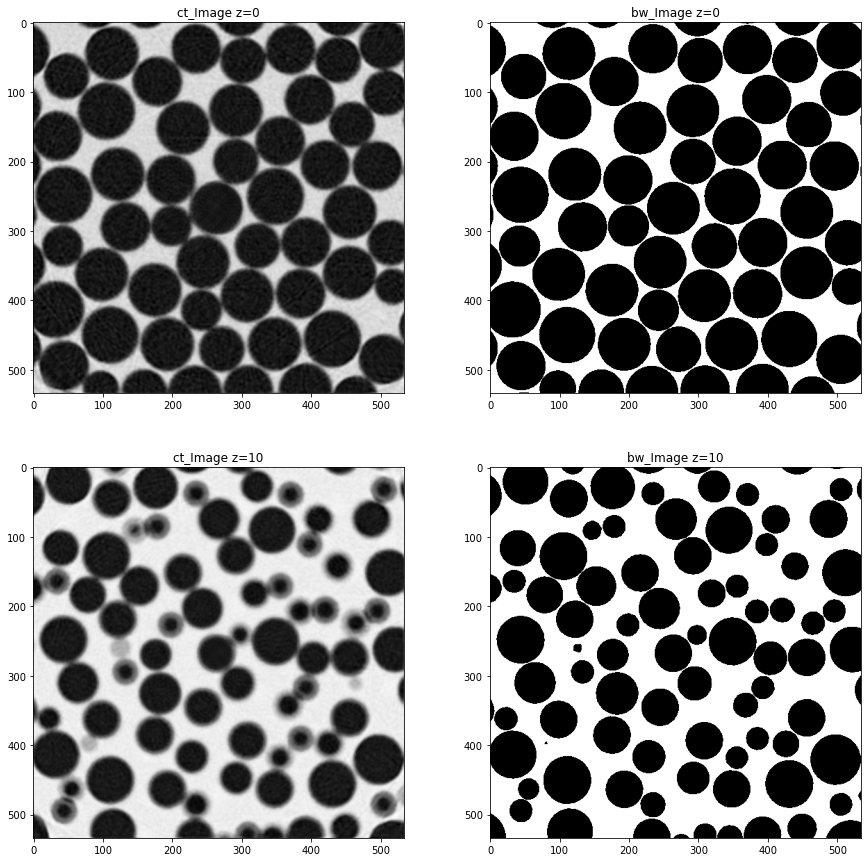

In [35]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))
ax1.imshow(beta_mat['ctImage'][:,:,0], cmap='Greys')
ax1.title.set_text("ct_Image z=0")

ax2.imshow(beta_mat['bwImage'][:,:,0], cmap='Greys')
ax2.title.set_text(f"bw_Image z=0")

ax3.imshow(beta_mat['ctImage'][:,:,40], cmap='Greys')
ax3.title.set_text(f"ct_Image z=10")

ax4.imshow(beta_mat['bwImage'][:,:,40], cmap='Greys')
ax4.title.set_text(f"bw_Image z=10")

plt.show()

In [36]:
beta_mat['bwImage'][:,:,40].sum()

141957

In [39]:
beta_mat['bwImage'][:,:,40].shape

(534, 534)

In [42]:
((534*534) - 141957) / (534*534)

0.5021777553339225

# Пористость

Считаем пористость как отношение объема пор к общему объему   
В слайсах bwImage - считаем что 1 - это объект, 0 - нет объекта (пористость)

In [12]:
# Объем грунта
V_objects = beta_mat['bwImage'].sum()
print(V_objects)

91008690


In [17]:
# Общий объем образца
size_sample = beta_mat['bwImage'].shape
print(size_sample)
V_sample = size_sample[0]*size_sample[1]*size_sample[2]
print(V_sample)

(516, 516, 516)
137388096


In [18]:
# Пористость по всему образцу
porosity_sample = (V_sample - V_objects) / V_sample
print(porosity_sample)

0.5096151367523255


### Расчитаем пористость для всех образцов

In [43]:
for filename in os.listdir(data_dir):
    extension = filename.split('.')[-1]
    if extension == 'mat':
        mat = scipy.io.loadmat(os.path.join(data_dir, filename))
        
        V_objects = mat['bwImage'].sum()
        size_sample = mat['bwImage'].shape
        V_sample = size_sample[0]*size_sample[1]*size_sample[2]
        porosity_sample = (V_sample - V_objects) / V_sample
        print(f"{filename} porosity = {porosity_sample}")
        del mat

Beta_1_0.2.mat porosity = 0.33757950907187767
Beta_1_0.5.mat porosity = 0.33533961484164154
Beta_1_0.mat porosity = 0.36716691822890835
Beta_2_0.2.mat porosity = 0.3476389541056017
Beta_2_0.5.mat porosity = 0.34720856775073783
Beta_2_0.mat porosity = 0.3841480447551069
Mono_1_0.2.mat porosity = 0.33865160824964907
Mono_1_0.5.mat porosity = 0.335870619867566
Mono_1_0.mat porosity = 0.3730443345534117
Mono_2_0.2.mat porosity = 0.3483297854276982
Mono_2_0.5.mat porosity = 0.3419709584575988
Mono_2_0.mat porosity = 0.3849479724939197
Mono_3_0.2.mat porosity = 0.349519087883713
Mono_3_0.5.mat porosity = 0.35571144354742423
Mono_3_0.mat porosity = 0.38869707418155836
Normal_1_0.2.mat porosity = 0.34499880645952363
Normal_1_0.5.mat porosity = 0.34684764219141007
Normal_1_0.mat porosity = 0.3799126830737608
Normal_2_0.2.mat porosity = 0.3368746097978768
Normal_2_0.5.mat porosity = 0.3408388179027185
Normal_2_0.mat porosity = 0.3708608573588165
Normal_3_0.2.mat porosity = 0.33862632107147983
No

### Рассчитаем пористость по одному из слайсов (берем центральный слайс по оси x, y, z)

In [44]:
for filename in os.listdir(data_dir):
    extension = filename.split('.')[-1]
    if extension == 'mat':
        mat = scipy.io.loadmat(os.path.join(data_dir, filename))
        
        size_sample = mat['bwImage'].shape
        
        V_objects_x = mat['bwImage'][size_sample[0]//2,:,:].sum()
        V_objects_y = mat['bwImage'][:,size_sample[1]//2,:].sum()
        V_objects_z = mat['bwImage'][:,:,size_sample[2]//2].sum()
        
        V_sample_x = 1*size_sample[1]*size_sample[2]
        V_sample_y = size_sample[0]*1*size_sample[2]
        V_sample_z = size_sample[0]*size_sample[1]*1
        
        porosity_sample_x = (V_sample_x - V_objects_x) / V_sample_x
        porosity_sample_y = (V_sample_y - V_objects_y) / V_sample_y
        porosity_sample_z = (V_sample_z - V_objects_z) / V_sample_z
        
        print(f"{filename} porosity (x, y, z) = {porosity_sample_x, porosity_sample_y, porosity_sample_z}")
        del mat

Beta_1_0.2.mat porosity (x, y, z) = (0.367976684093504, 0.32634006369809504, 0.33125638483264225)
Beta_1_0.5.mat porosity (x, y, z) = (0.3187595813336859, 0.3115483435236438, 0.3287438223848543)
Beta_1_0.mat porosity (x, y, z) = (0.38329119290223923, 0.37479371375796755, 0.3783970991233781)
Beta_2_0.2.mat porosity (x, y, z) = (0.3361952406706328, 0.3184040923021453, 0.3730169460969894)
Beta_2_0.5.mat porosity (x, y, z) = (0.336444366349481, 0.32130933715397925, 0.3217891706314879)
Beta_2_0.mat porosity (x, y, z) = (0.367893363632538, 0.3866725581786811, 0.3874510794091655)
Mono_1_0.2.mat porosity (x, y, z) = (0.3469931972789116, 0.34569795918367346, 0.3510240362811791)
Mono_1_0.5.mat porosity (x, y, z) = (0.3399248908108264, 0.35374051683475616, 0.3034792909634932)
Mono_1_0.mat porosity (x, y, z) = (0.36278369089615287, 0.3802290723553725, 0.3496911383972505)
Mono_2_0.2.mat porosity (x, y, z) = (0.3451114716663662, 0.35565395709392467, 0.38107685836187727)
Mono_2_0.5.mat porosity (x, y

### Пористость по 20 слайсам

In [45]:
n_slice = 10
for filename in os.listdir(data_dir):
    extension = filename.split('.')[-1]
    if extension == 'mat':
        mat = scipy.io.loadmat(os.path.join(data_dir, filename))
        
        size_sample = mat['bwImage'].shape
        
        bw_mat_x = mat['bwImage'][size_sample[0]//2-n_slice:size_sample[0]//2+n_slice ,:,:]
        bw_mat_y = mat['bwImage'][:,size_sample[1]//2-n_slice:size_sample[1]//2+n_slice,:]
        bw_mat_z = mat['bwImage'][:,:,size_sample[2]//2-n_slice:size_sample[2]//2+n_slice]
        
        V_objects_x = bw_mat_x.sum()
        V_objects_y = bw_mat_y.sum()
        V_objects_z = bw_mat_z.sum()
        
        V_sample_x = bw_mat_x.shape[0]*bw_mat_x.shape[1]*bw_mat_x.shape[2]
        V_sample_y = bw_mat_y.shape[0]*bw_mat_y.shape[1]*bw_mat_y.shape[2]
        V_sample_z = bw_mat_z.shape[0]*bw_mat_z.shape[1]*bw_mat_z.shape[2]
        
        porosity_sample_x = (V_sample_x - V_objects_x) / V_sample_x
        porosity_sample_y = (V_sample_y - V_objects_y) / V_sample_y
        porosity_sample_z = (V_sample_z - V_objects_z) / V_sample_z
        
        print(f"{filename} porosity_{2*n_slice} (x, y, z) = {porosity_sample_x, porosity_sample_y, porosity_sample_z}")
        

Beta_1_0.2.mat porosity_20 (x, y, z) = (0.3624188750676041, 0.33001284478096266, 0.3304408163571901)
Beta_1_0.5.mat porosity_20 (x, y, z) = (0.32319674386526637, 0.32191297915602074, 0.3280782658724061)
Beta_1_0.mat porosity_20 (x, y, z) = (0.38363090281457707, 0.37282850610910084, 0.37648677497009797)
Beta_2_0.2.mat porosity_20 (x, y, z) = (0.3350087885343429, 0.3233688630490956, 0.37391326392644675)
Beta_2_0.5.mat porosity_20 (x, y, z) = (0.3434664927551903, 0.33169485969939444, 0.3260255595804498)
Beta_2_0.mat porosity_20 (x, y, z) = (0.37290167487270126, 0.3892770974484142, 0.3860660480579051)
Mono_1_0.2.mat porosity_20 (x, y, z) = (0.35217360544217685, 0.3482392743764172, 0.3506893424036281)
Mono_1_0.5.mat porosity_20 (x, y, z) = (0.34137972627993474, 0.34542287625707074, 0.31036514011860483)
Mono_1_0.mat porosity_20 (x, y, z) = (0.35316166785265485, 0.37398806189344275, 0.35887239019515815)
Mono_2_0.2.mat porosity_20 (x, y, z) = (0.34650543086352986, 0.3502345487050057, 0.3722162

### Динамика пористости по слайсам (слайсы по оси z)

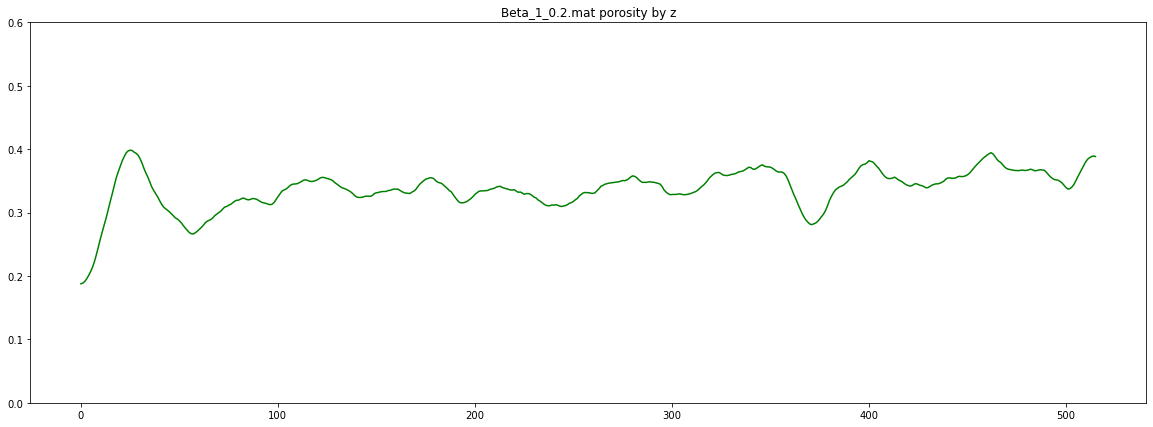

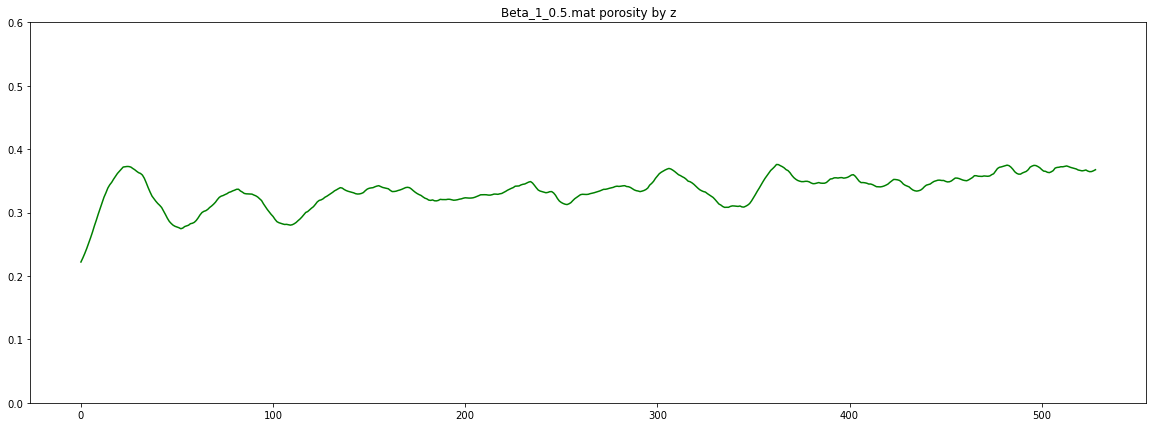

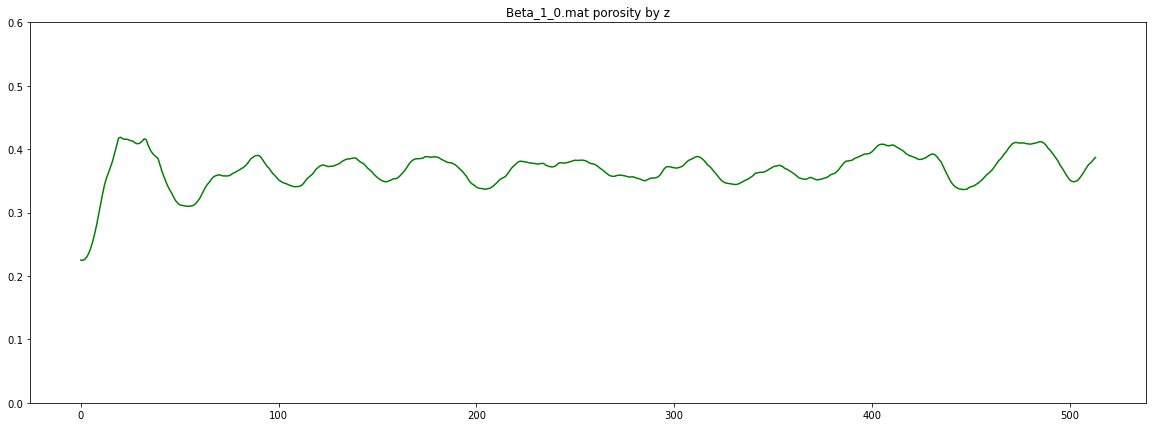

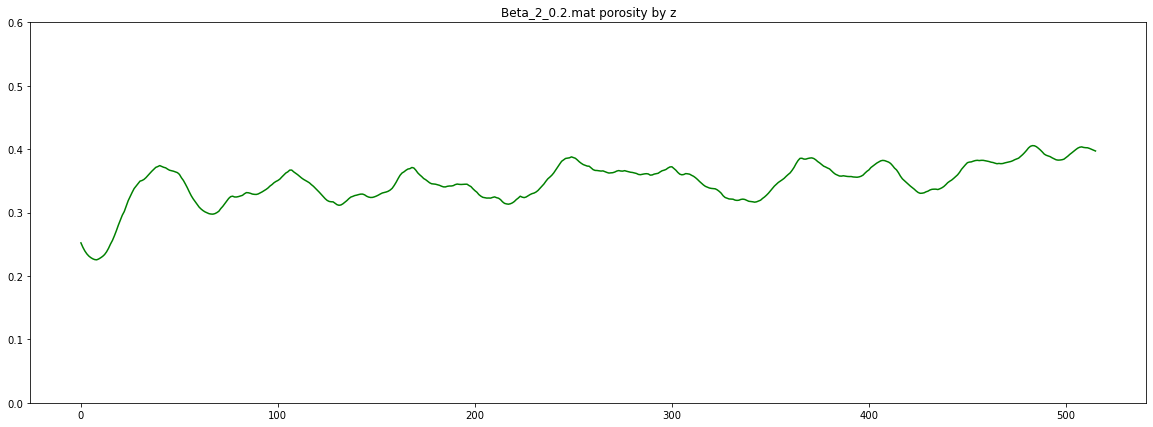

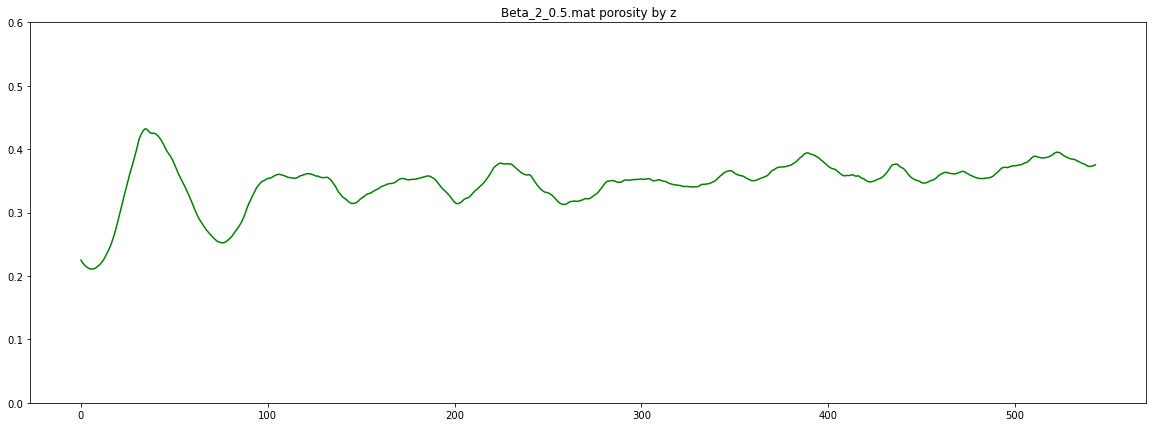

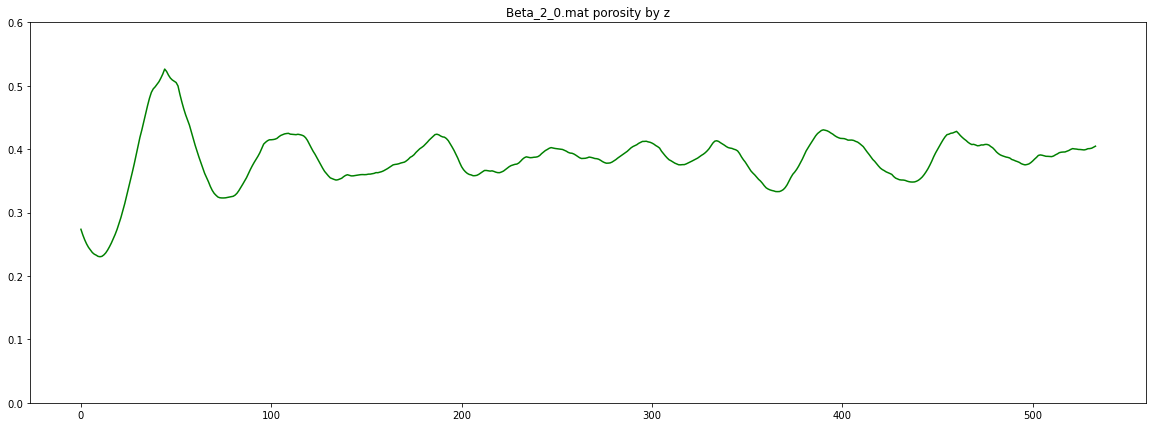

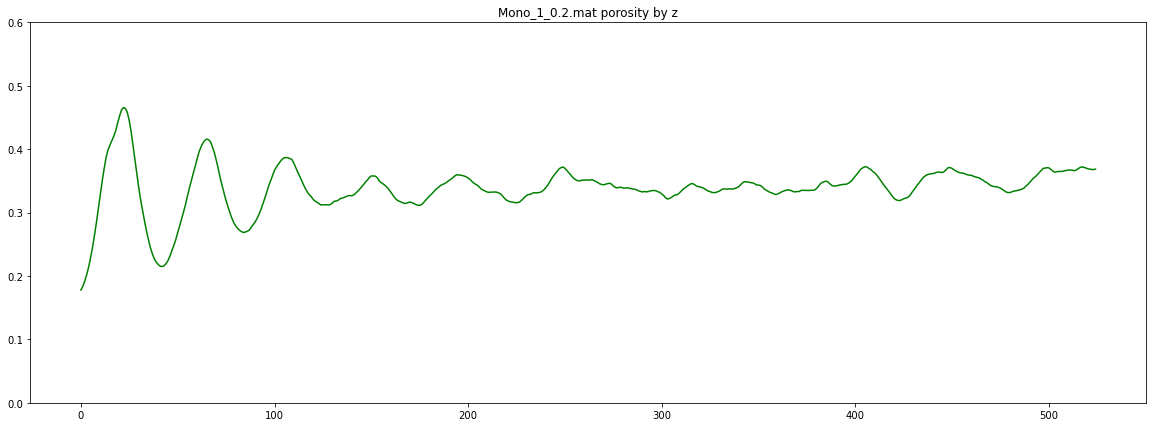

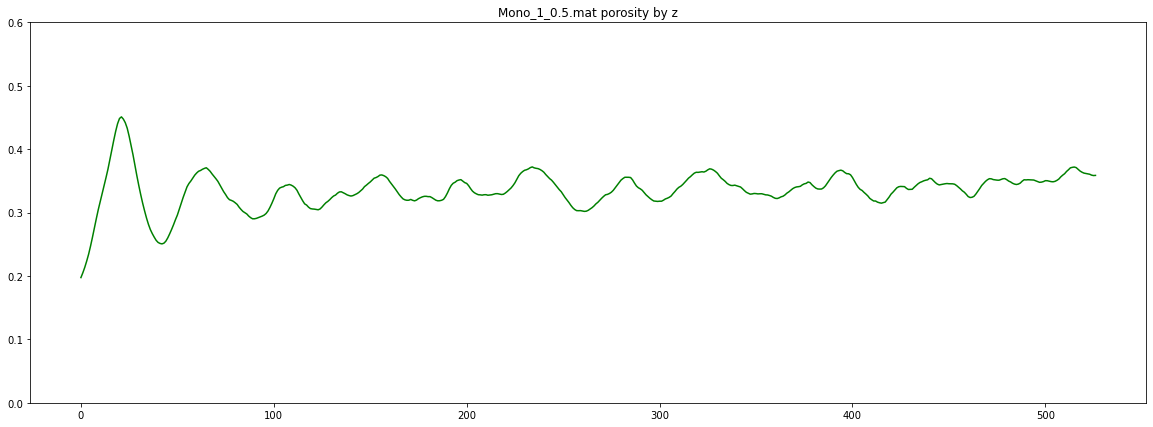

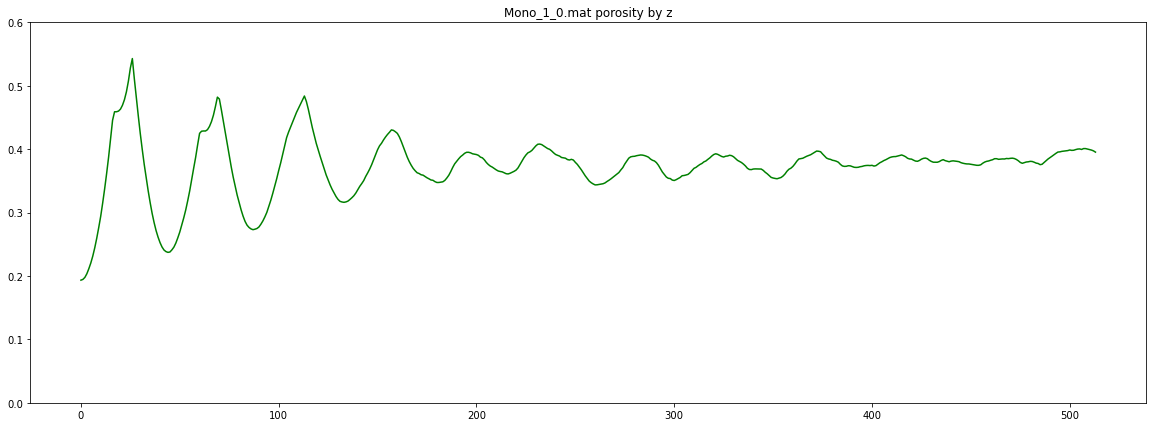

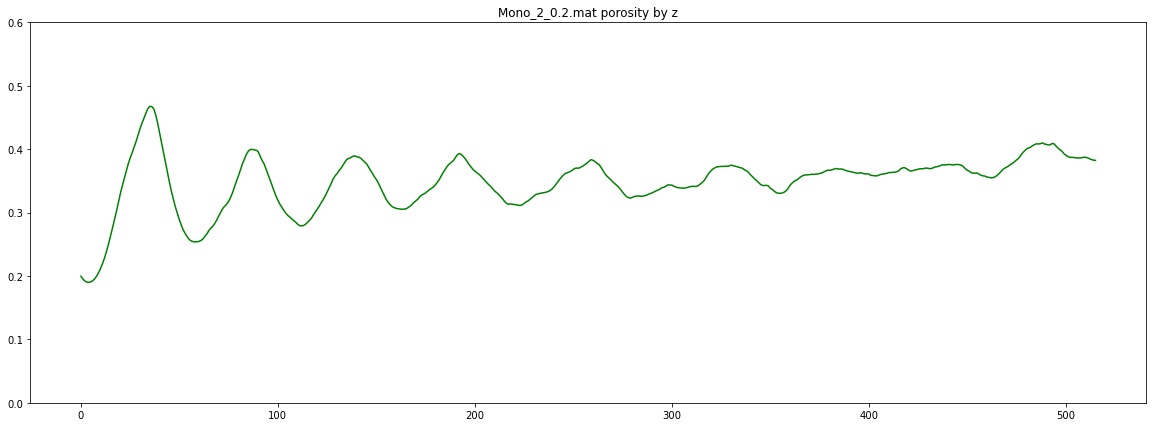

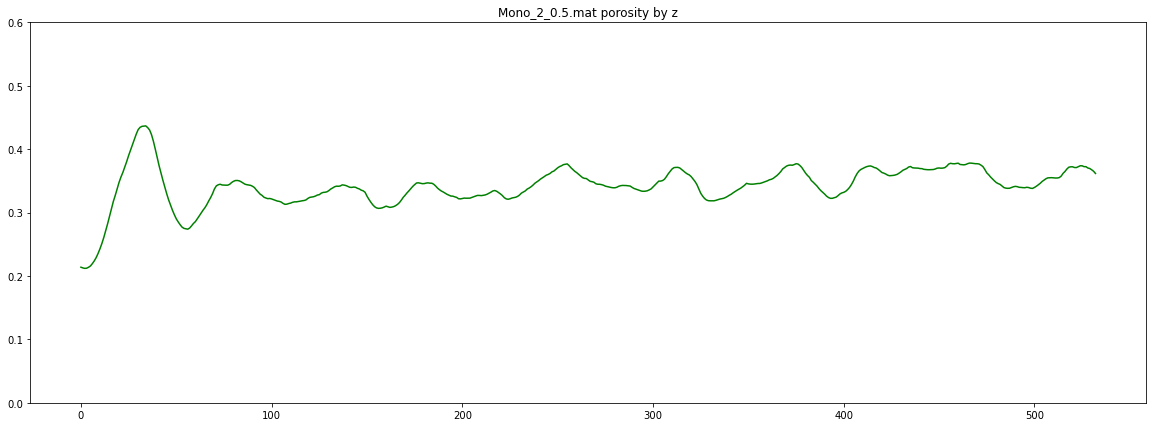

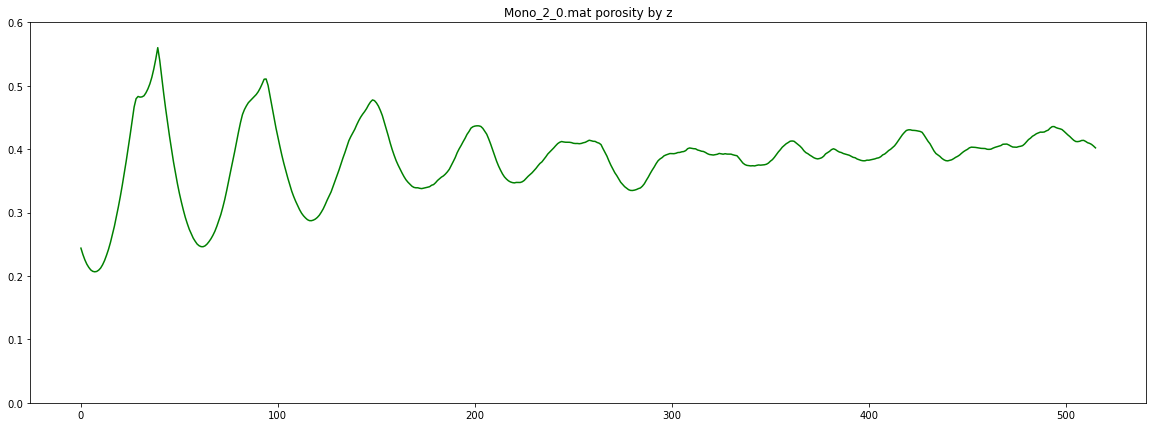

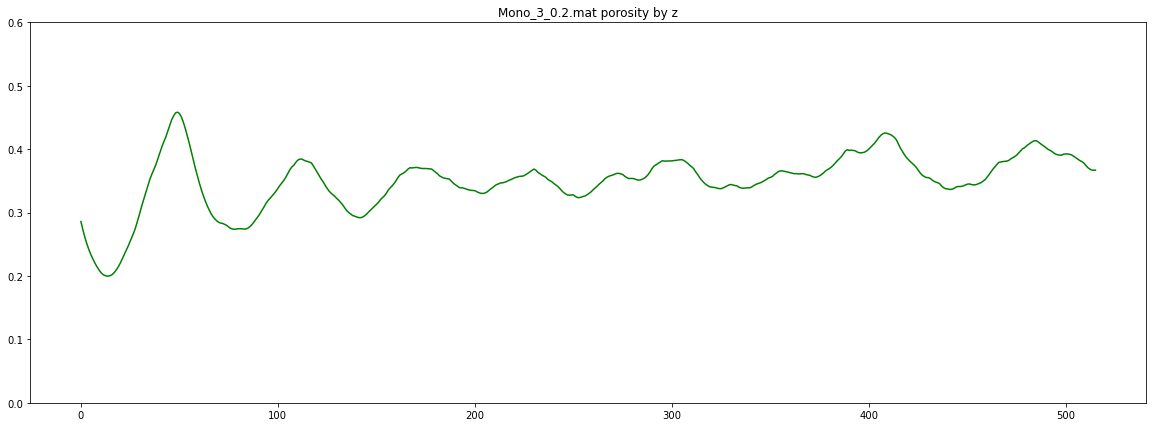

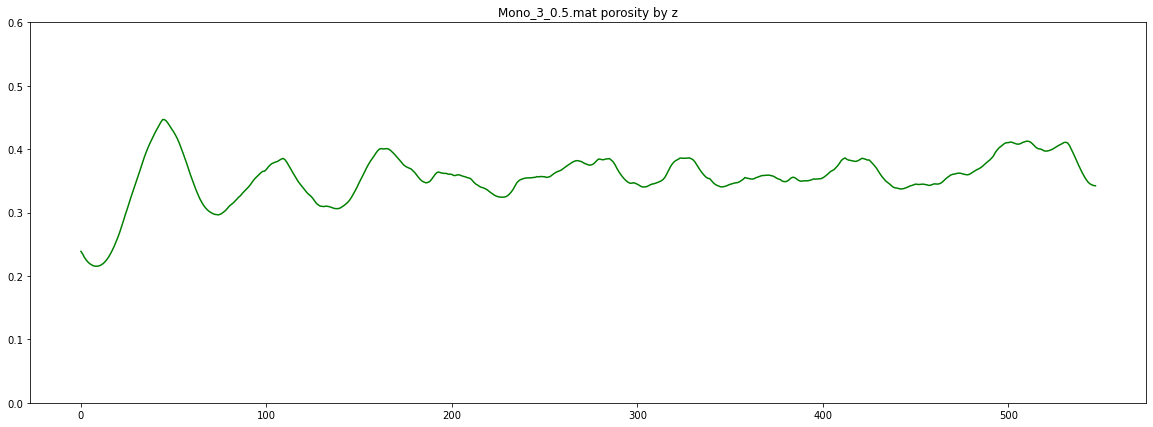

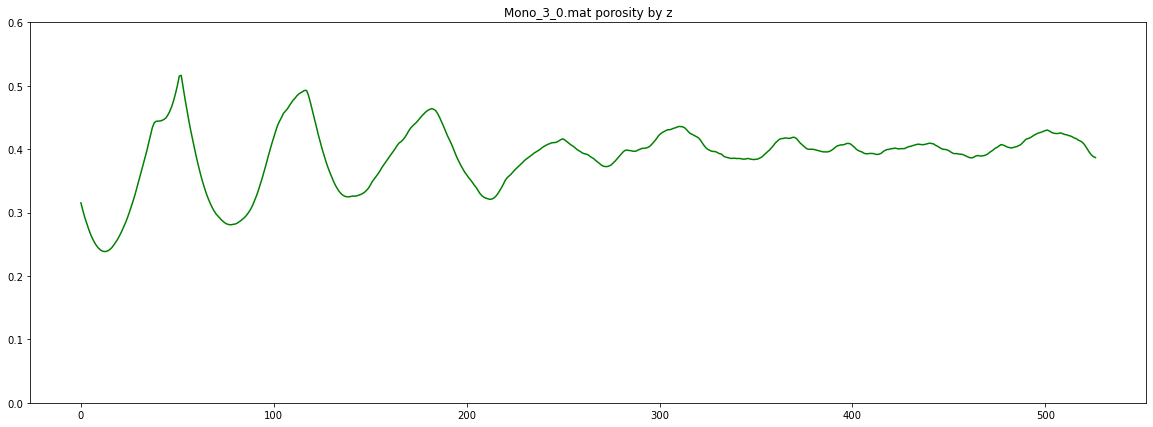

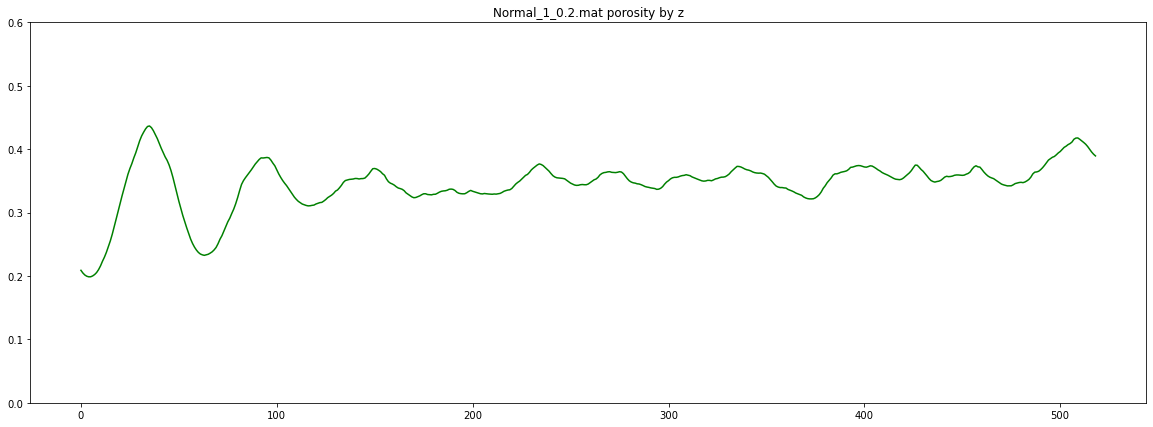

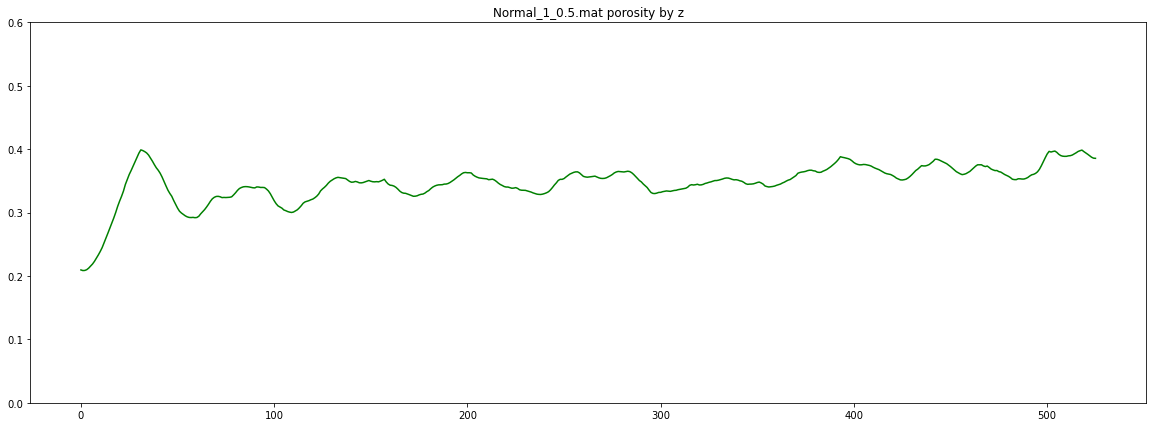

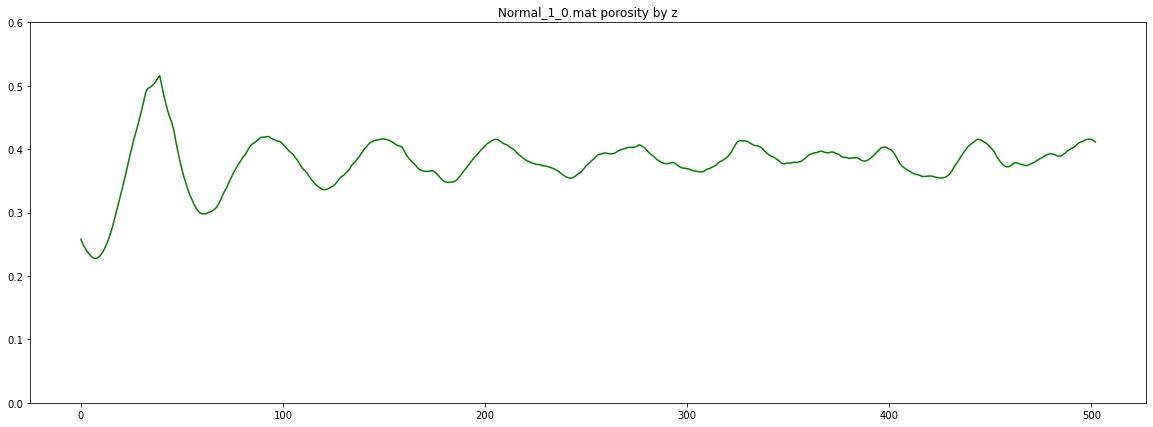

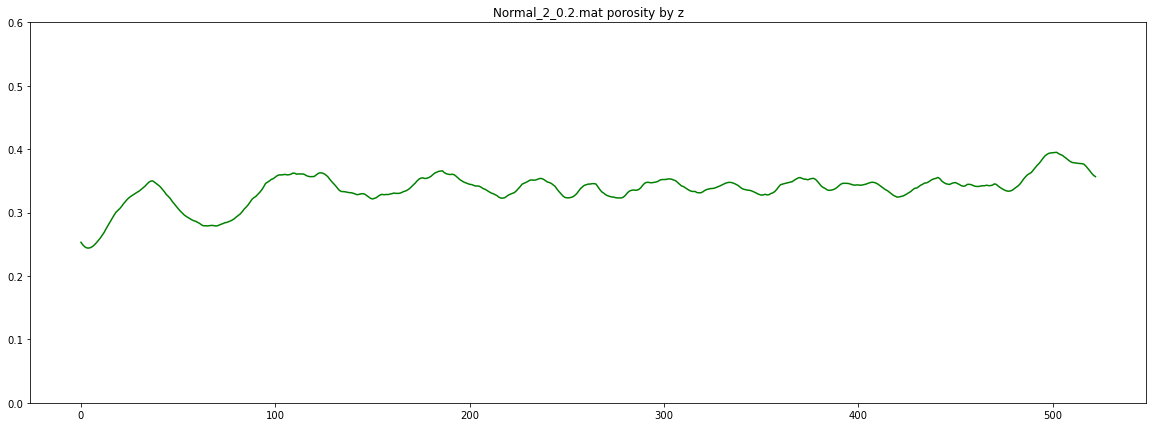

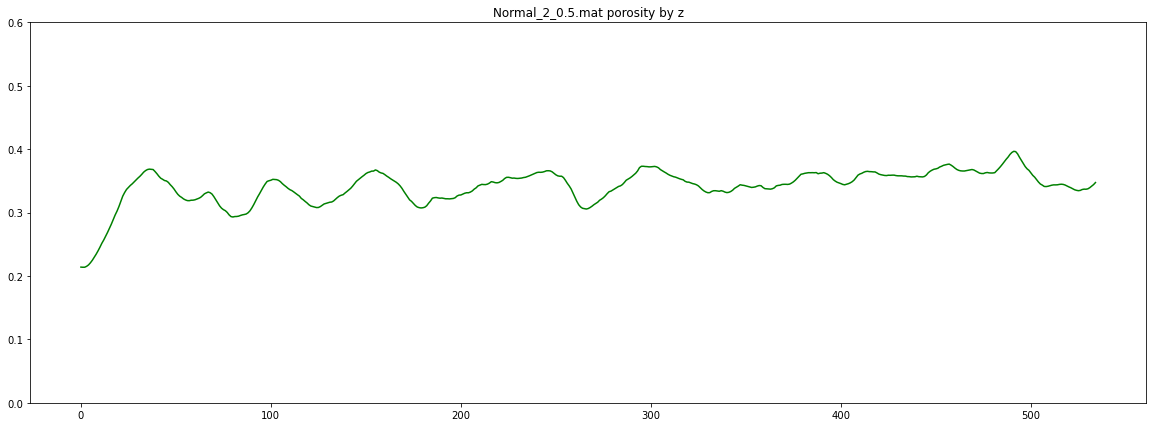

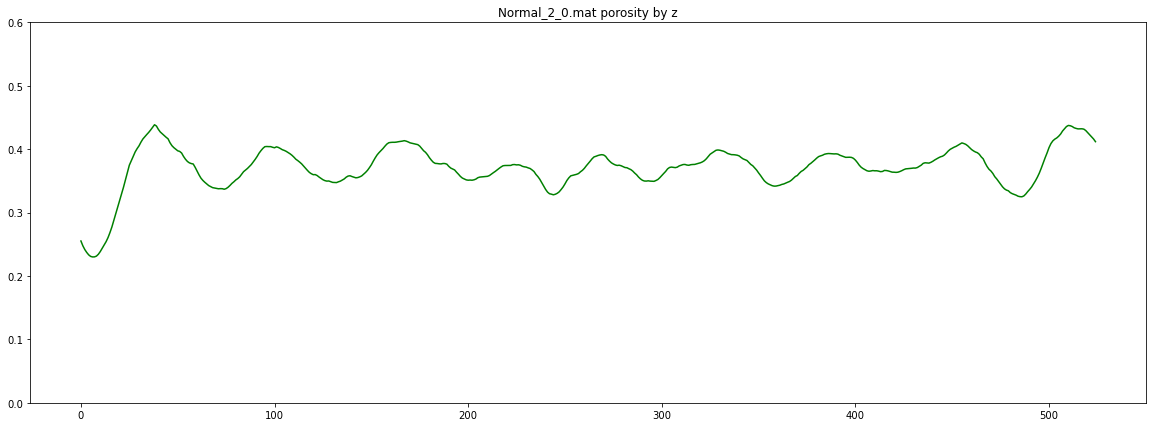

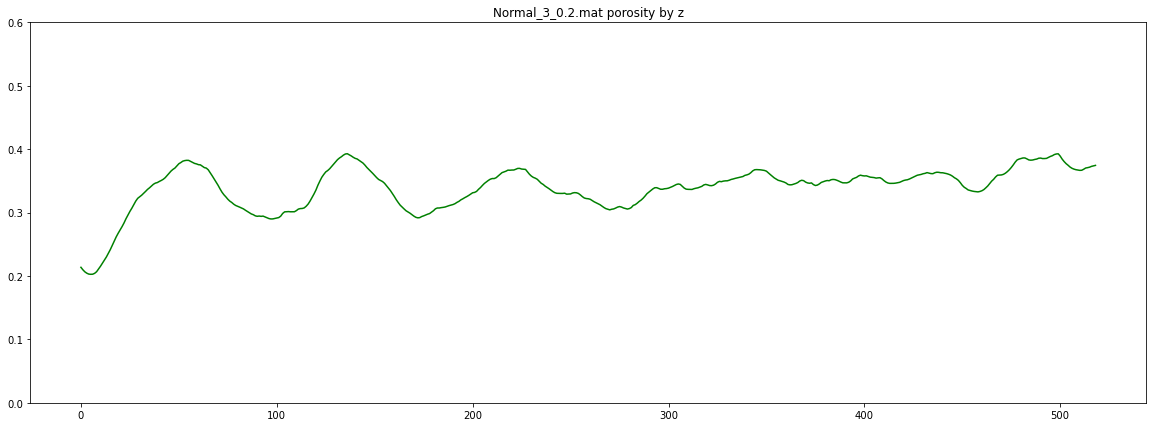

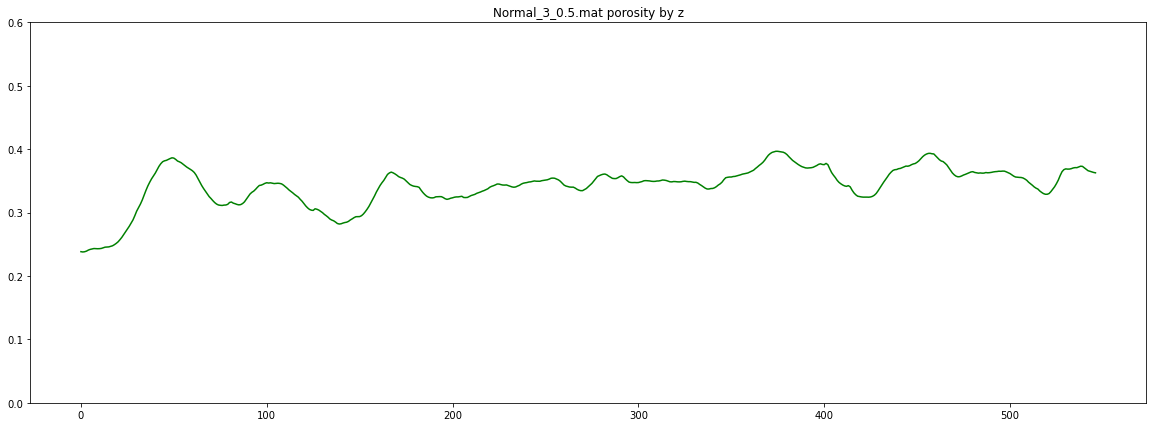

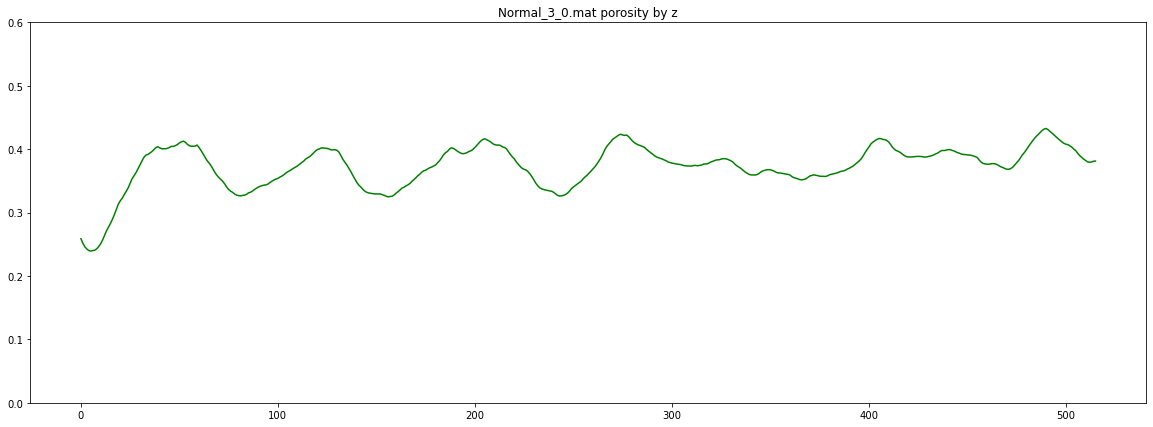

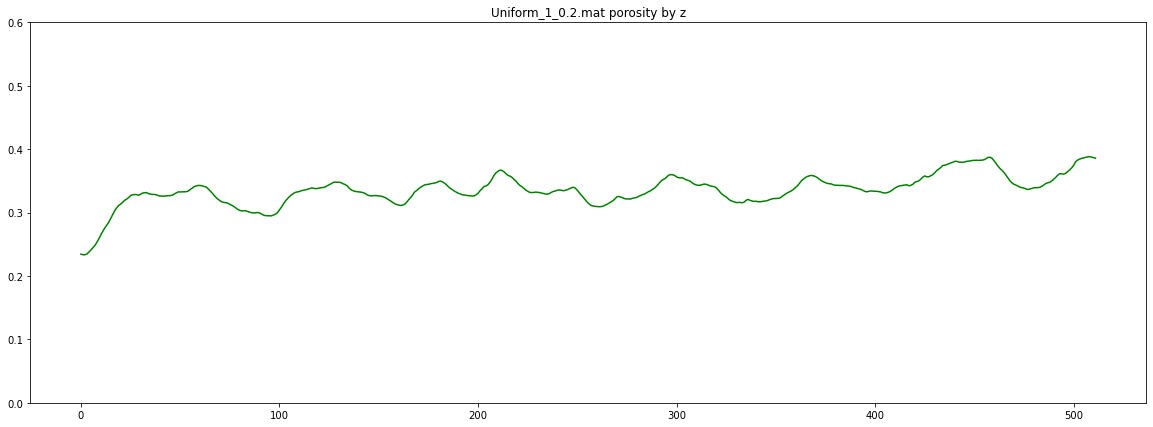

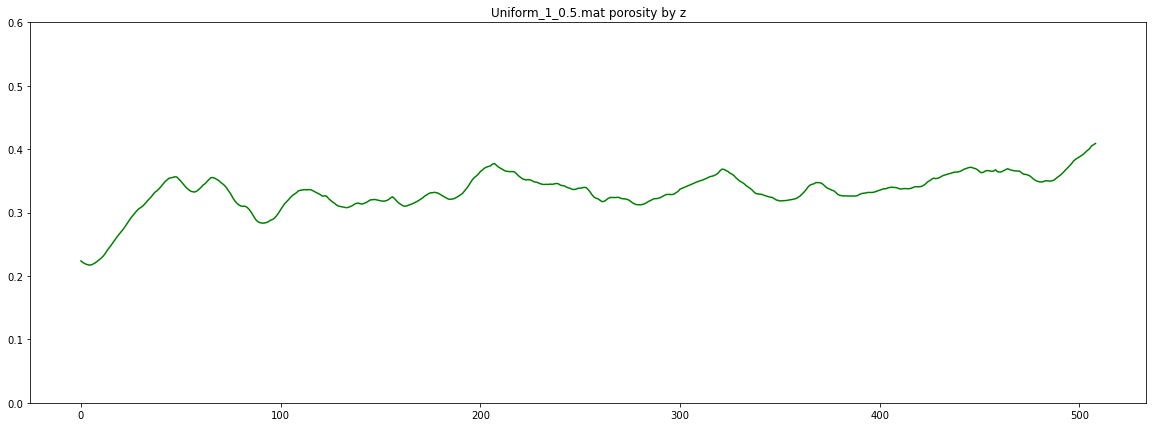

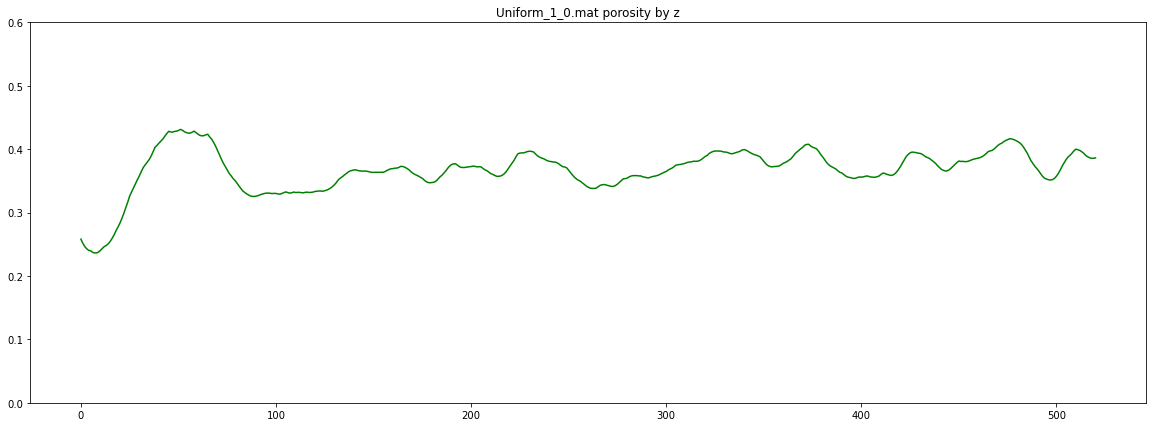

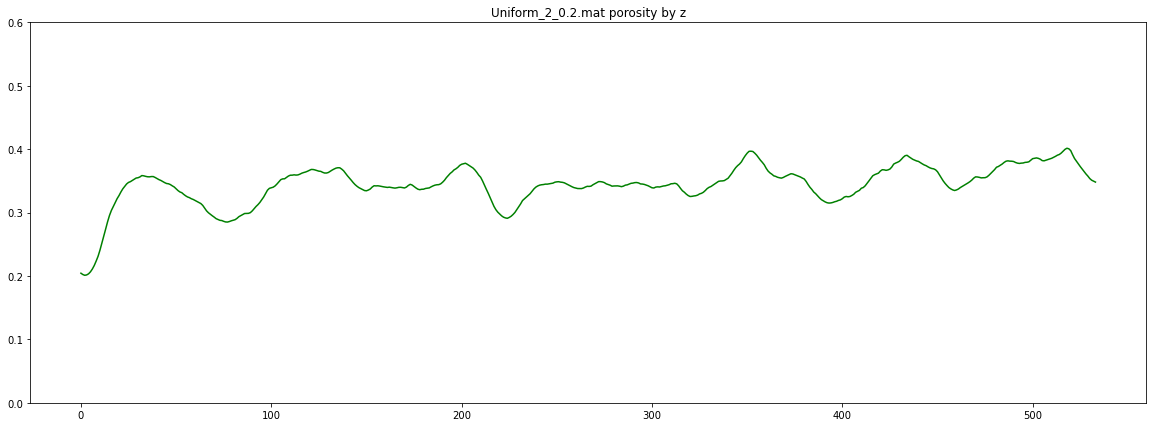

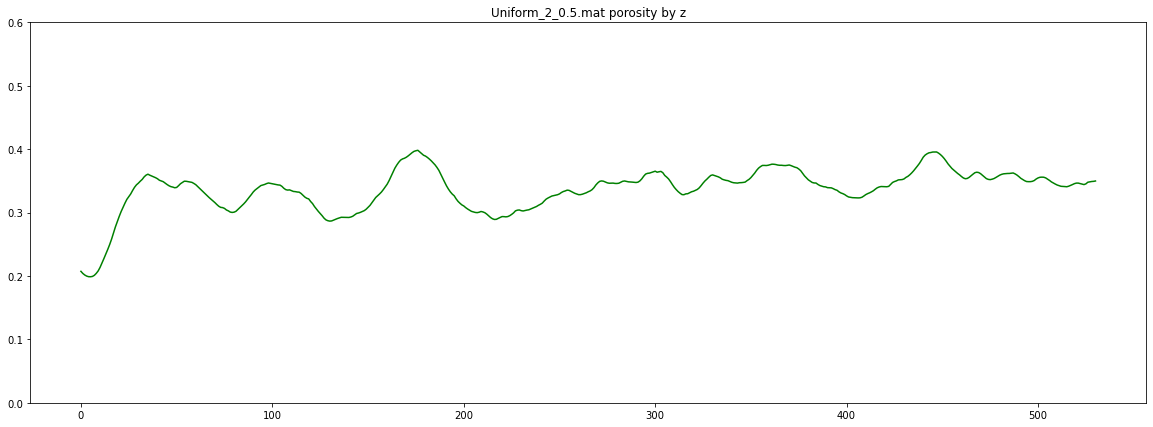

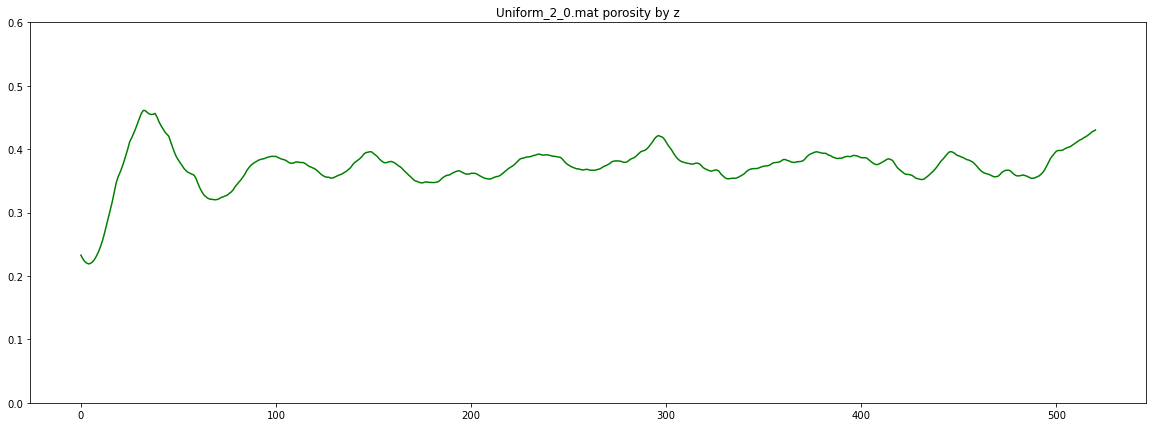

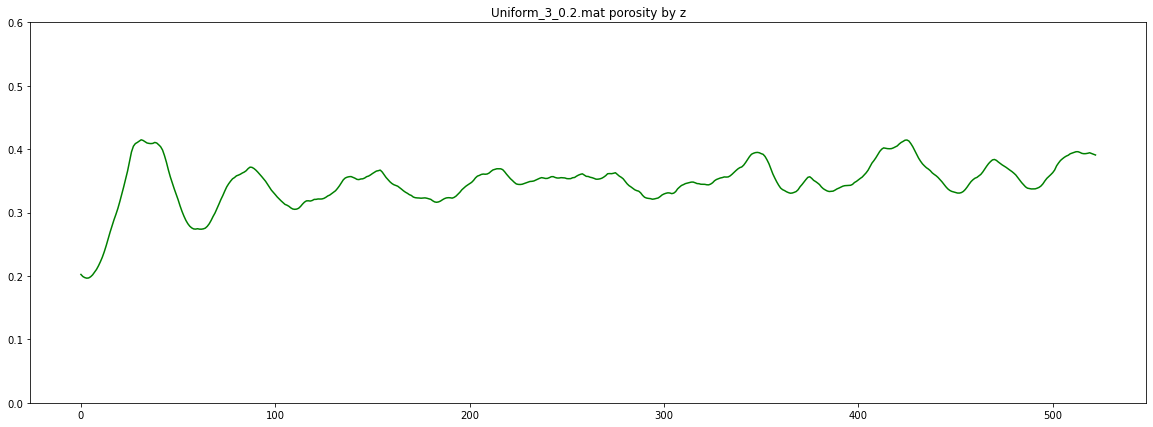

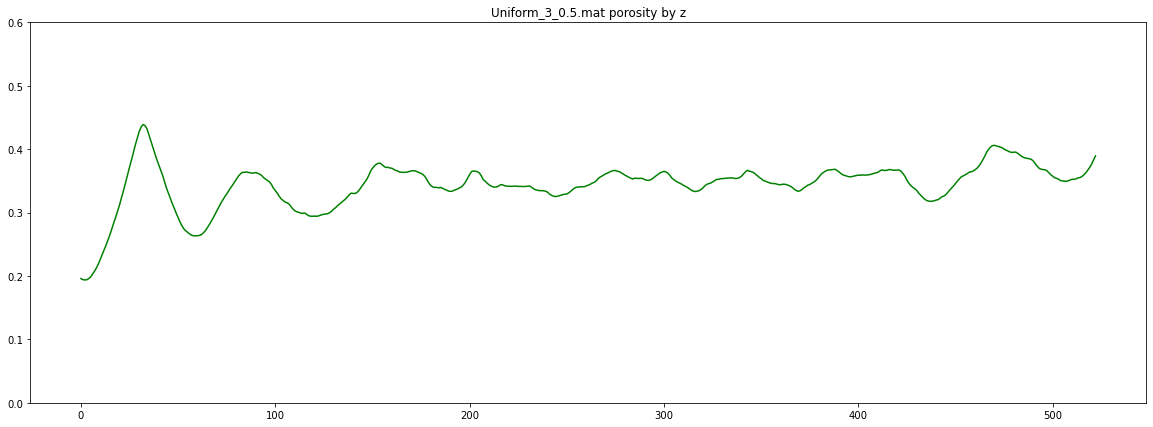

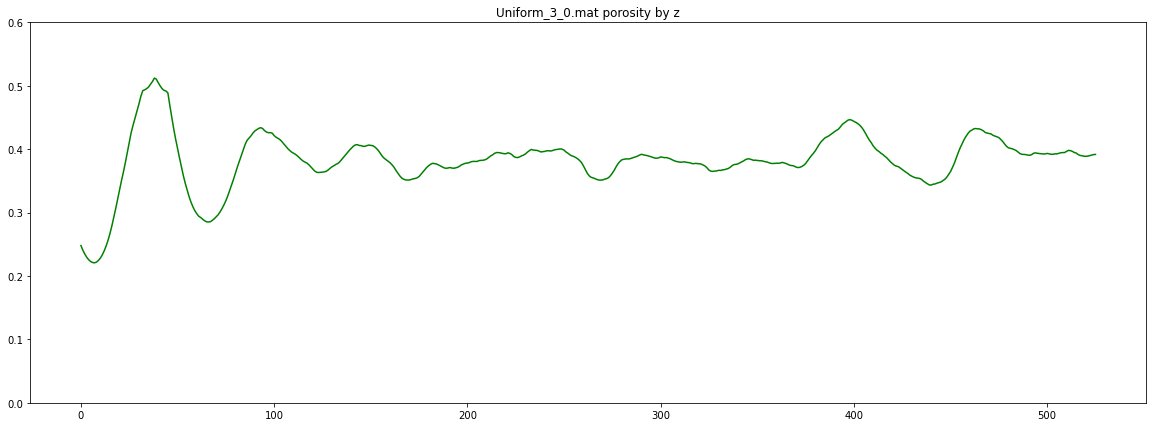

In [47]:
for filename in os.listdir(data_dir):
    extension = filename.split('.')[-1]
    if extension!= 'mat':
        continue
    mat = scipy.io.loadmat(os.path.join(data_dir, filename))
    size_sample = mat['bwImage'].shape
    V_sample_z = size_sample[0]*size_sample[1]*1
    
    data_porosity_z = []
    for id_slice in range(size_sample[2]):
        V_objects_z = mat['bwImage'][:,:,id_slice].sum()
        porosity_sample_z = (V_sample_z - V_objects_z) / V_sample_z
                
        data_porosity_z.append(porosity_sample_z)
    plt.figure(figsize=(20, 7))
    plt.figure(1)
    plt.title(f"{filename} porosity by z")
    plt.plot(data_porosity_z, color='green')
    plt.ylim(0,0.6)
    plt.show()

In [48]:
### Динамика пористости по n-слайсам (слайсы по оси z)

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in longlong_scalars
  


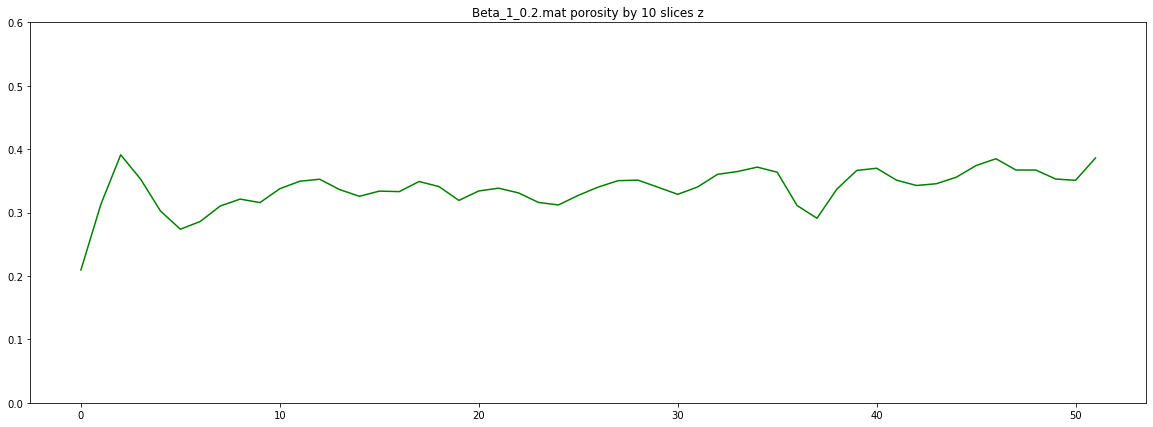

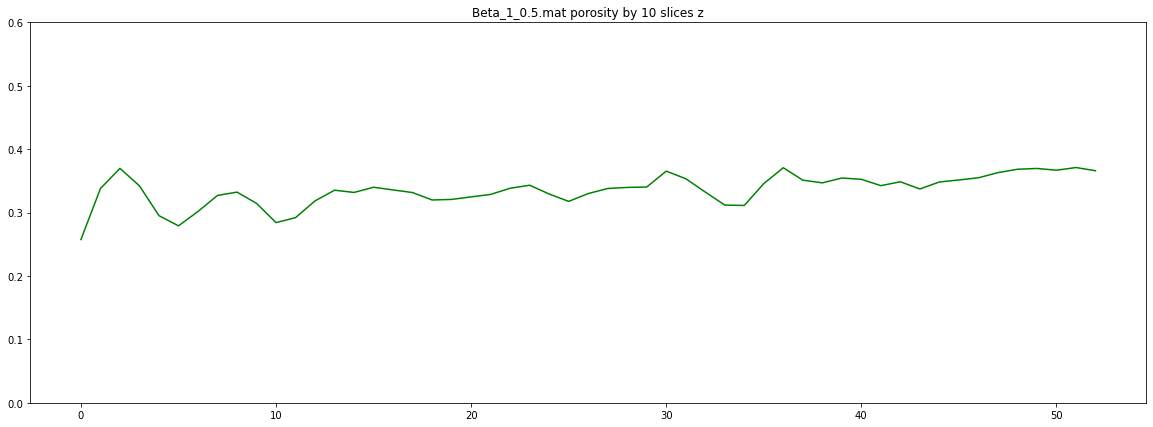

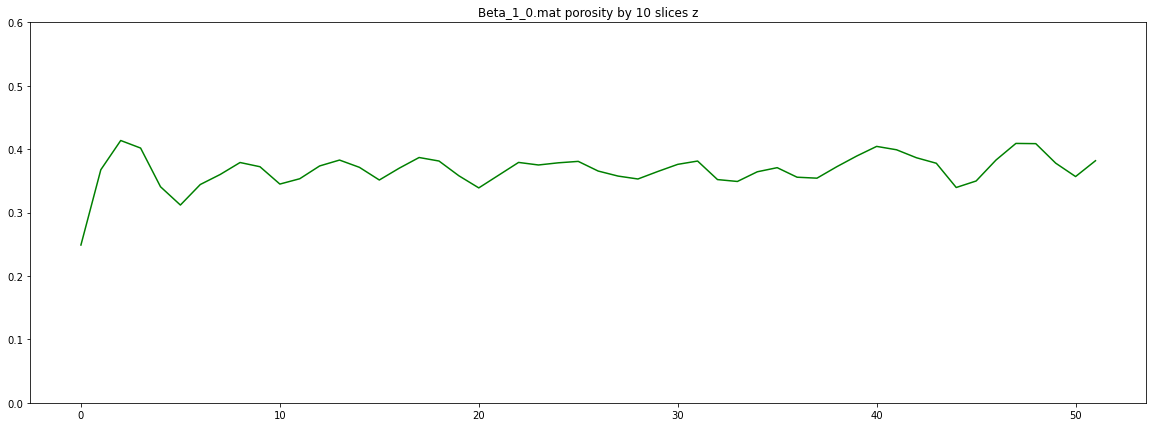

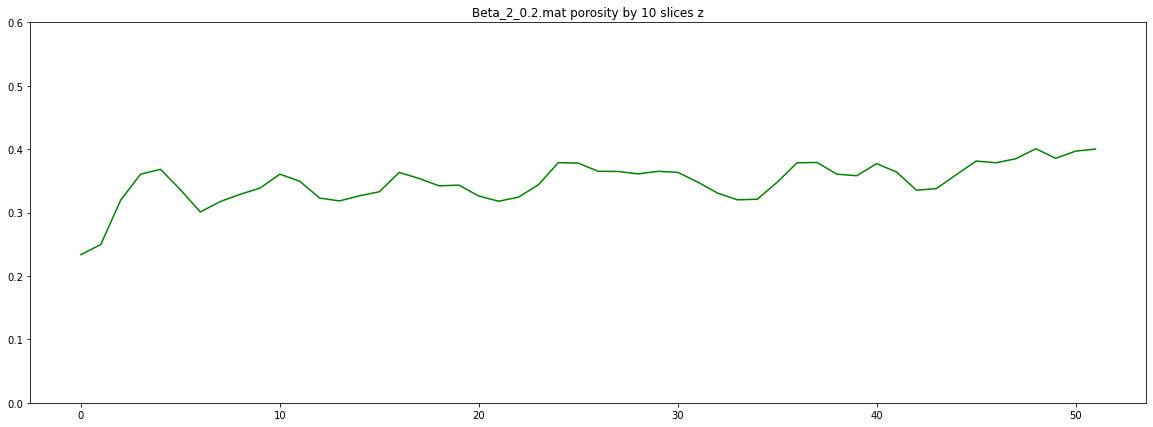

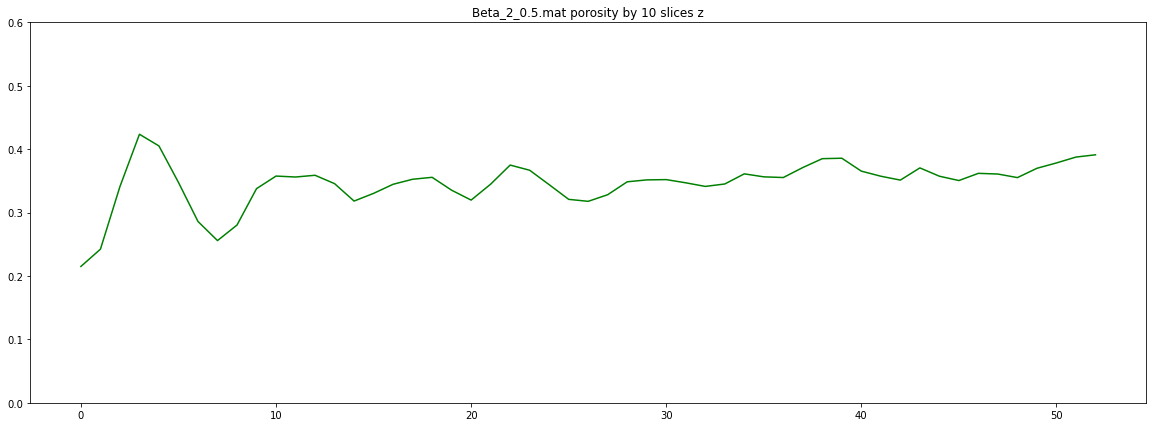

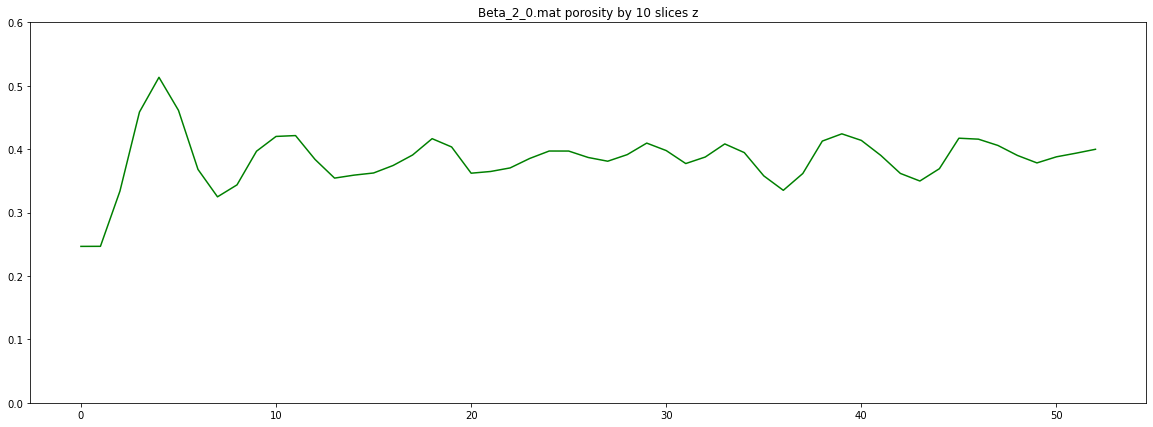

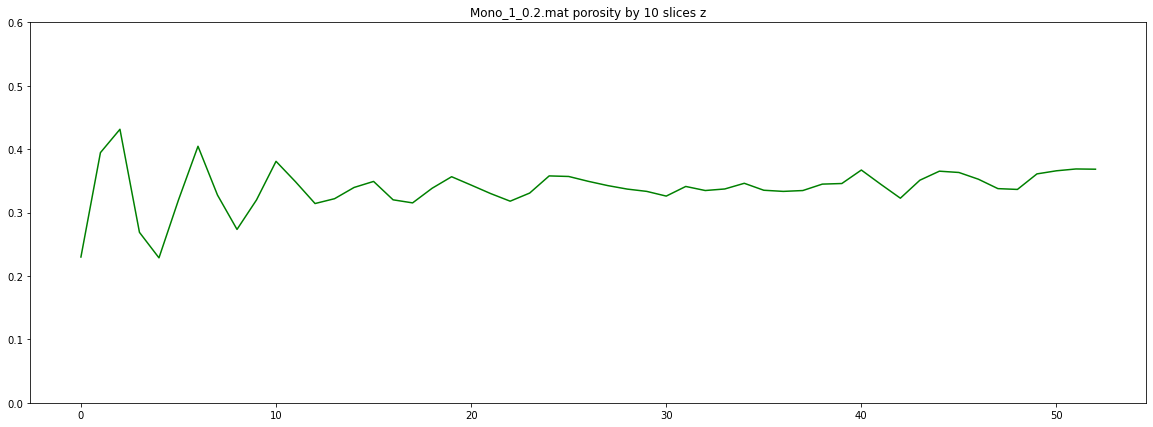

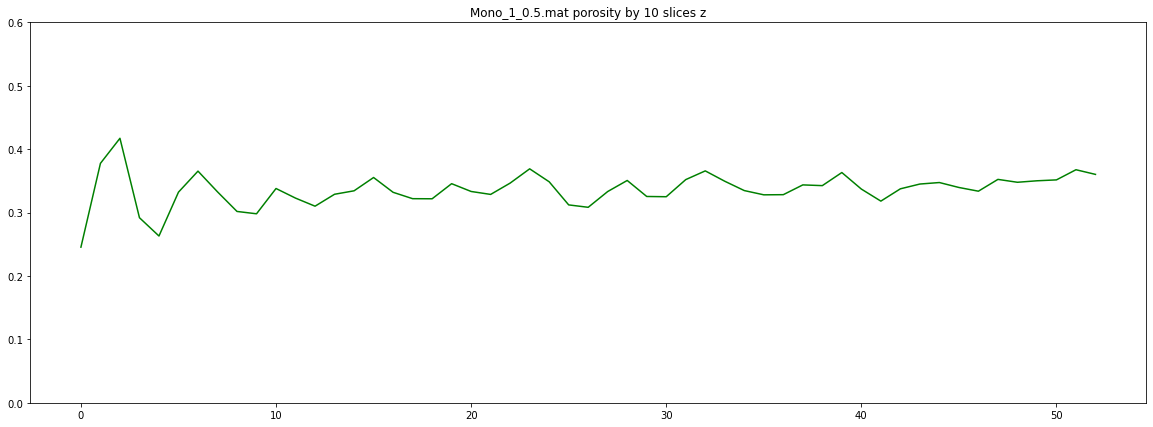

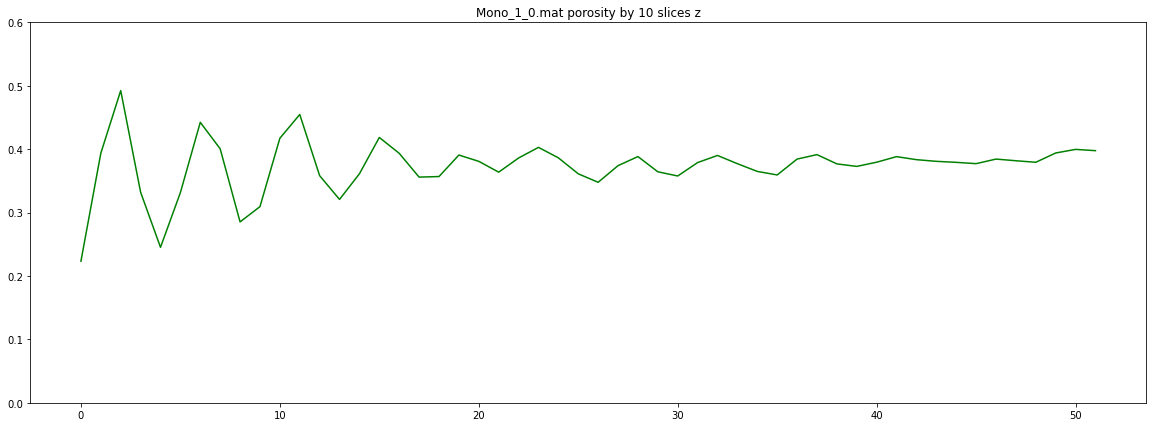

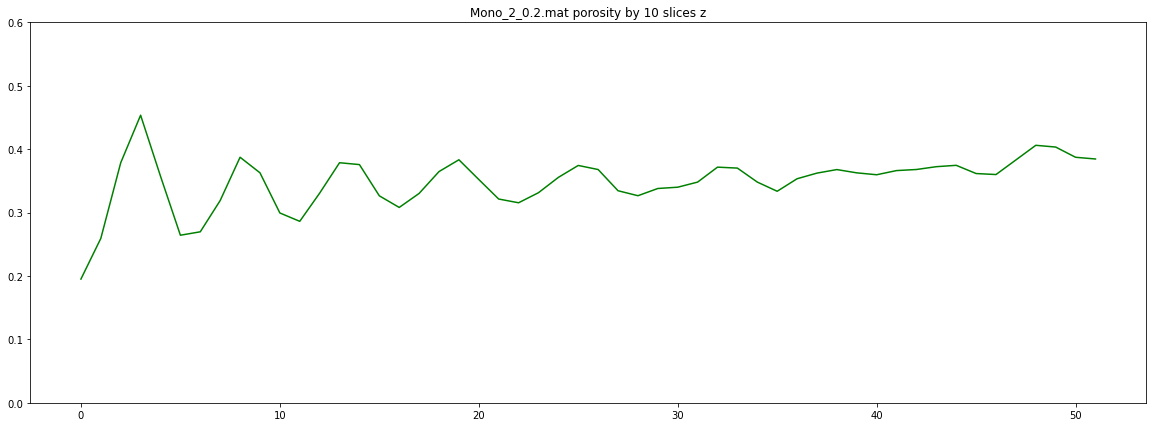

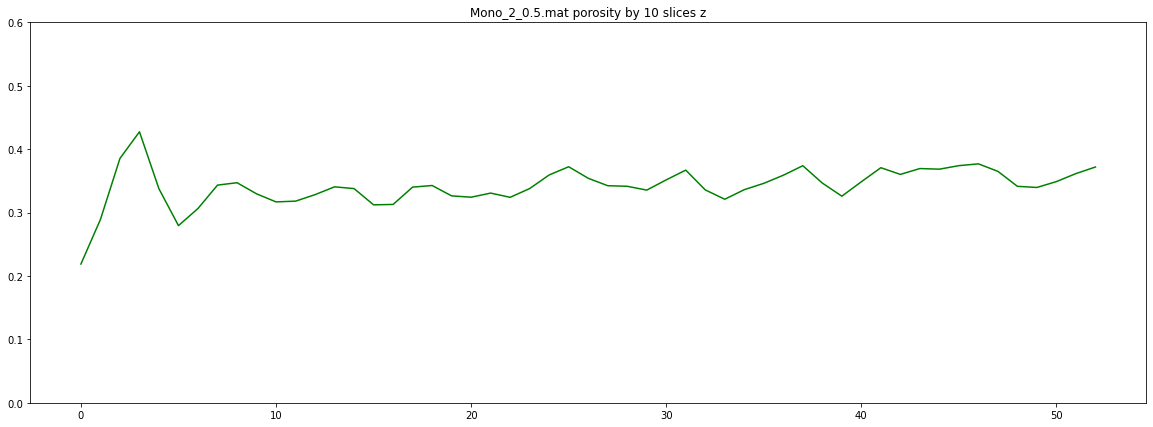

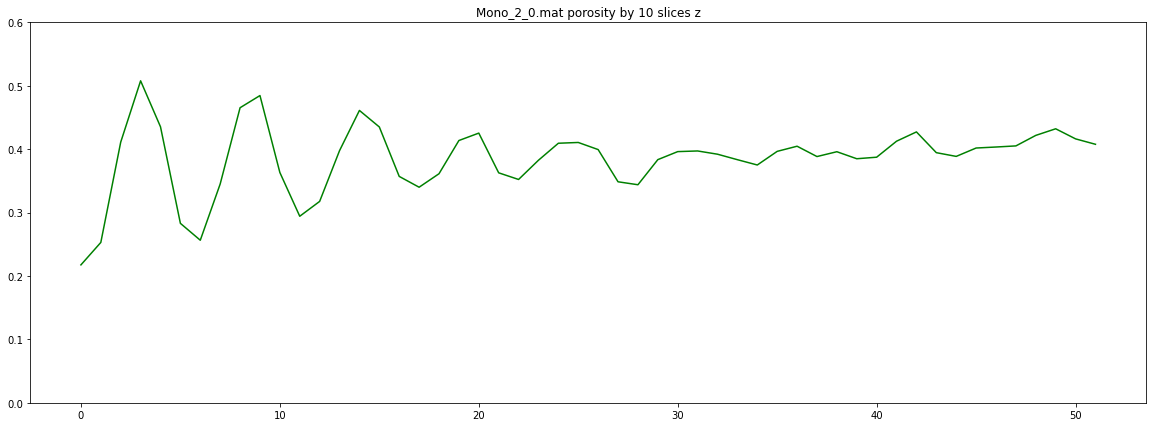

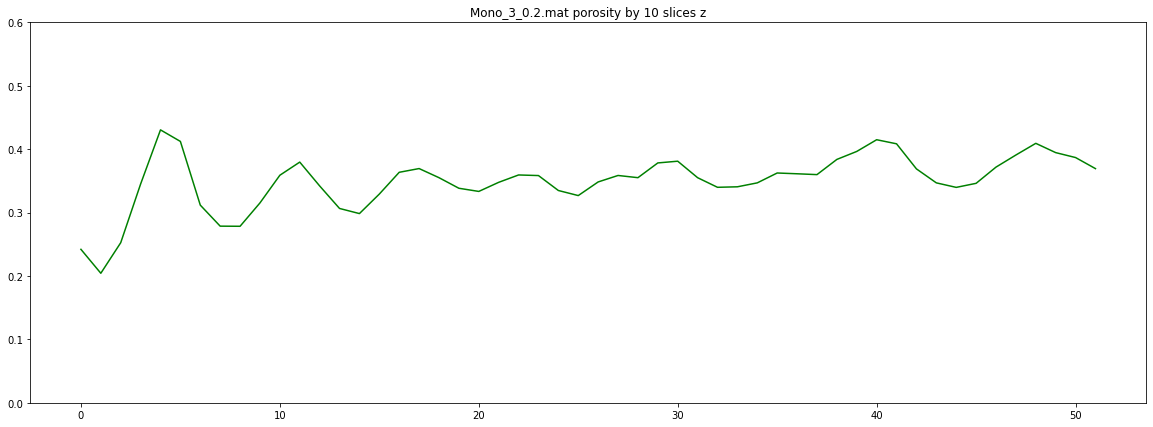

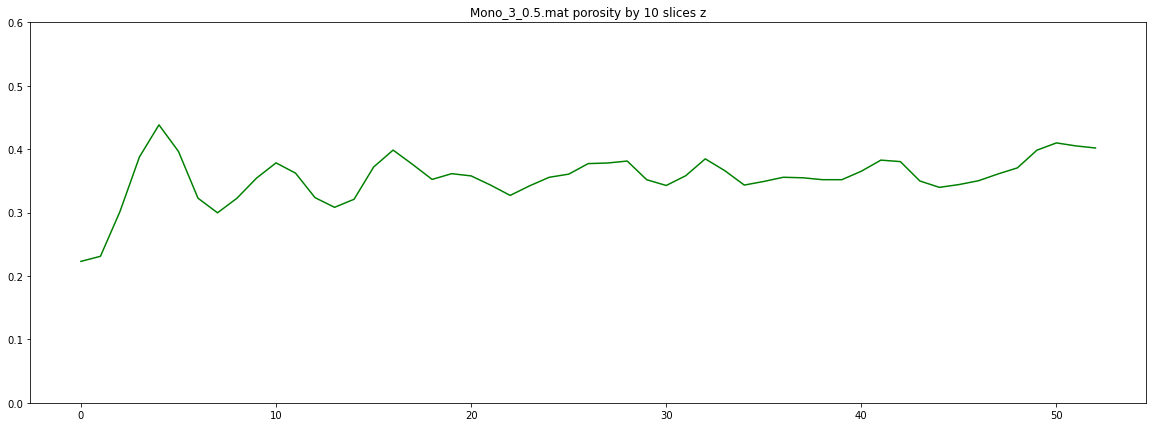

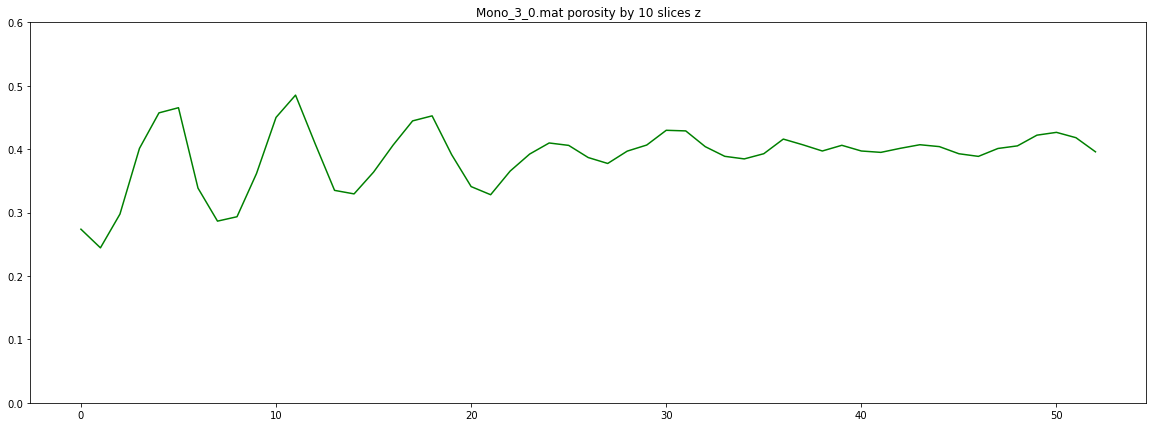

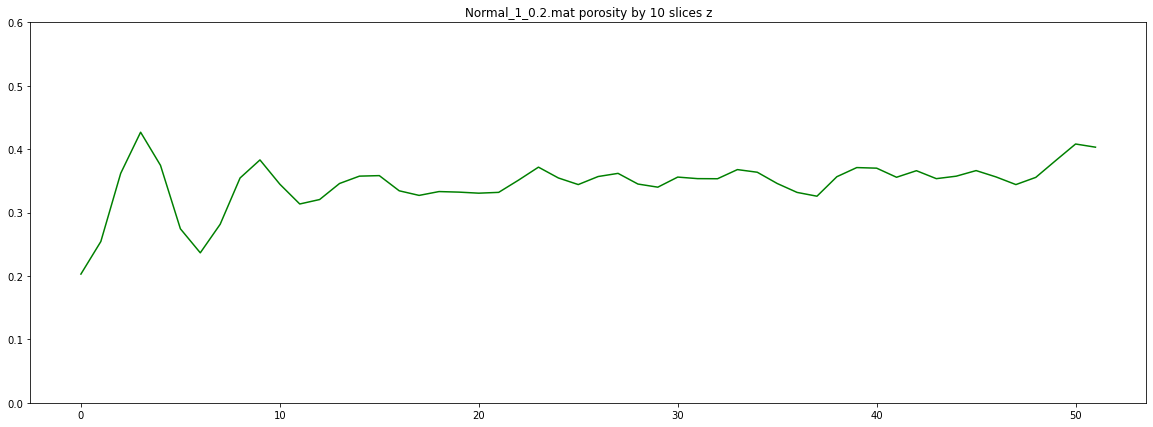

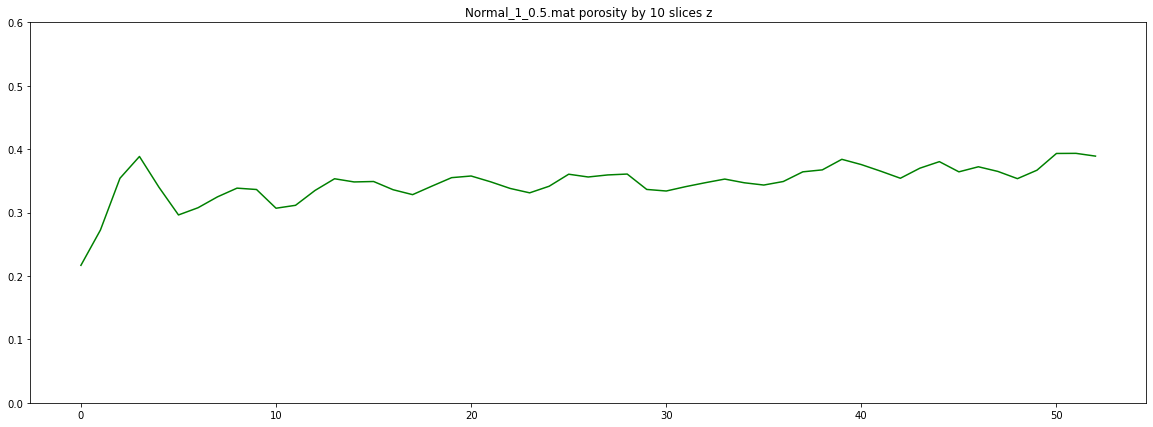

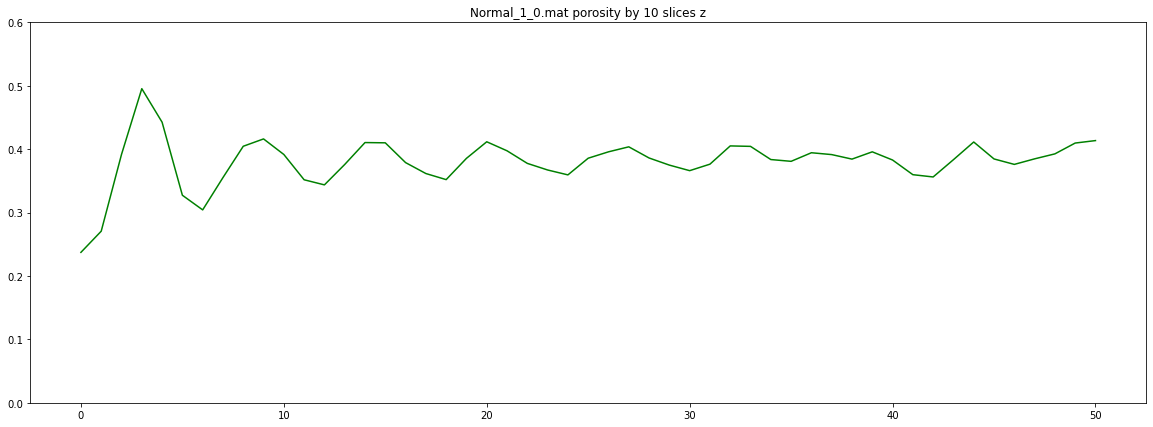

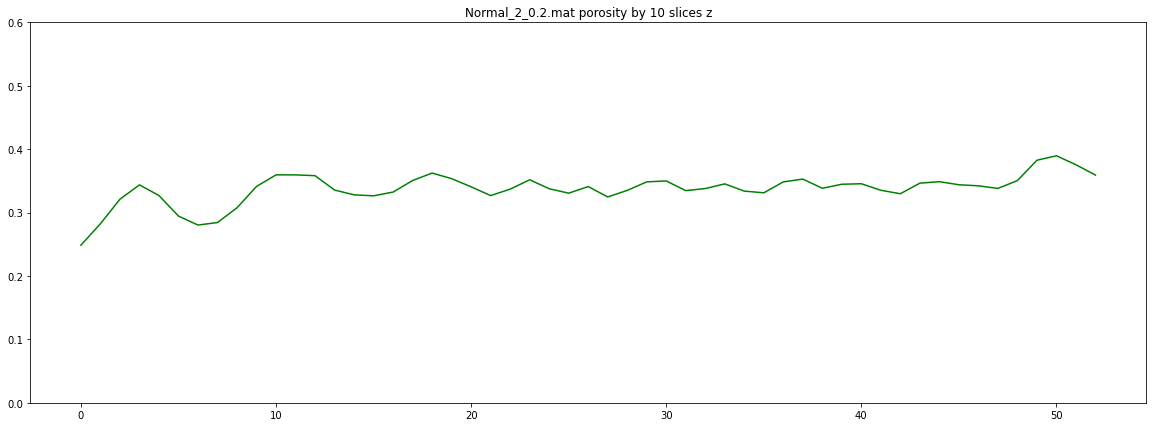

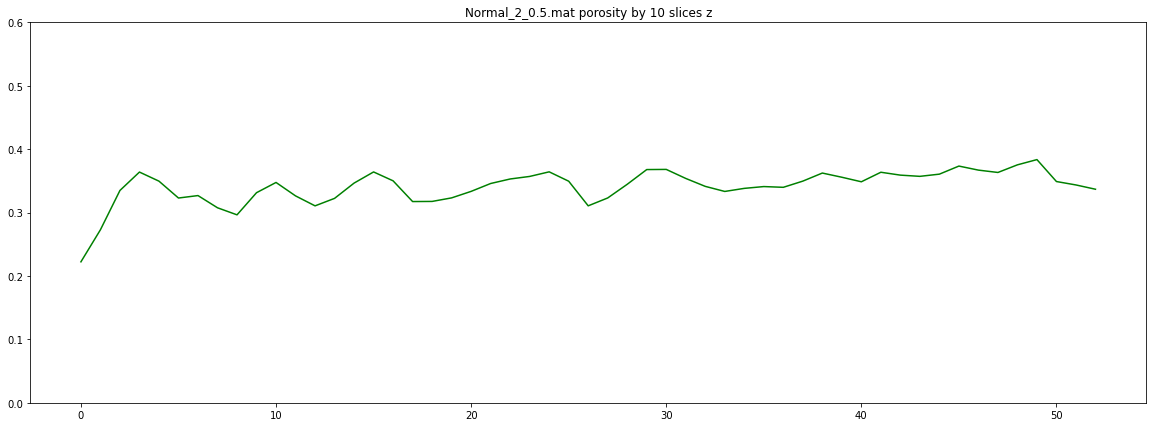

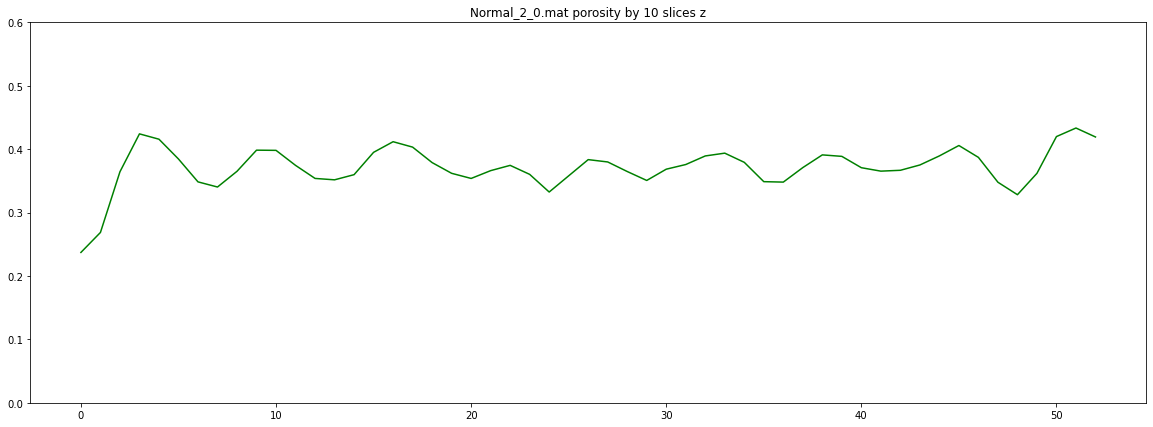

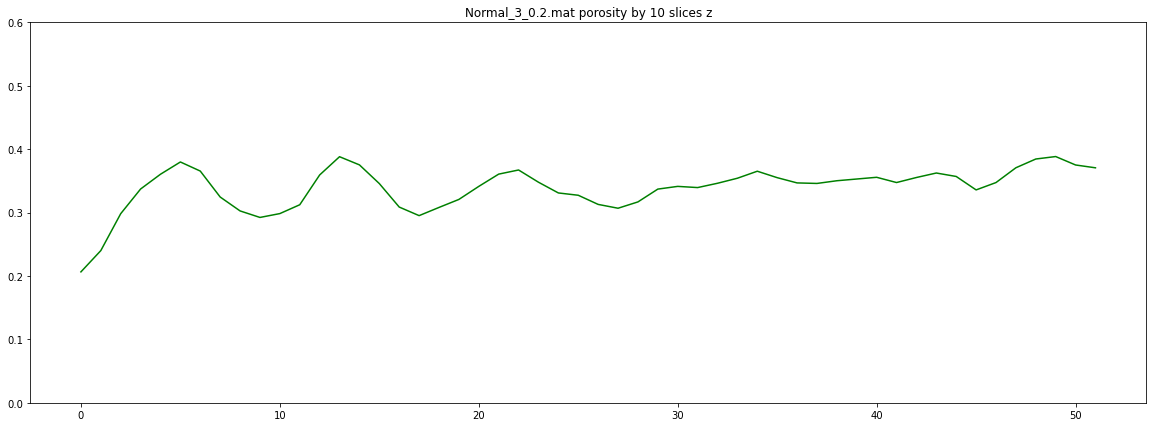

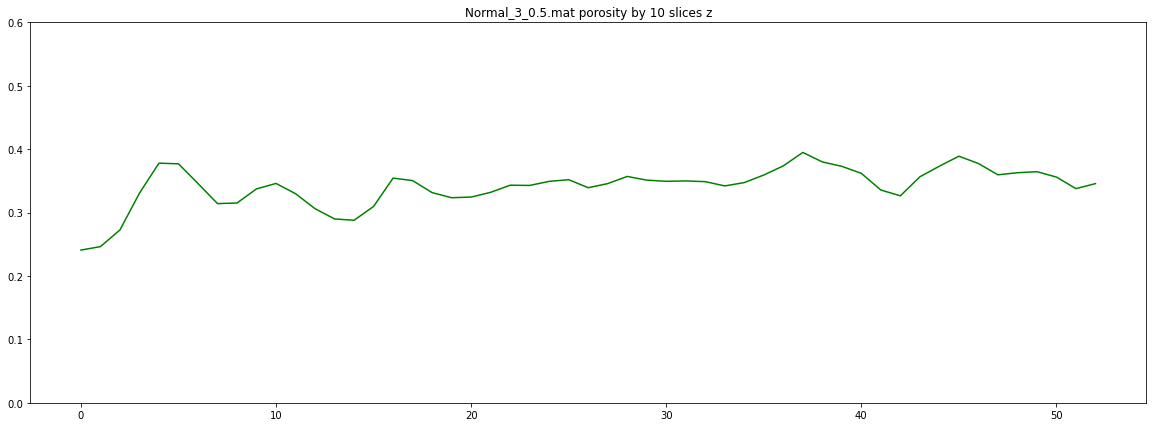

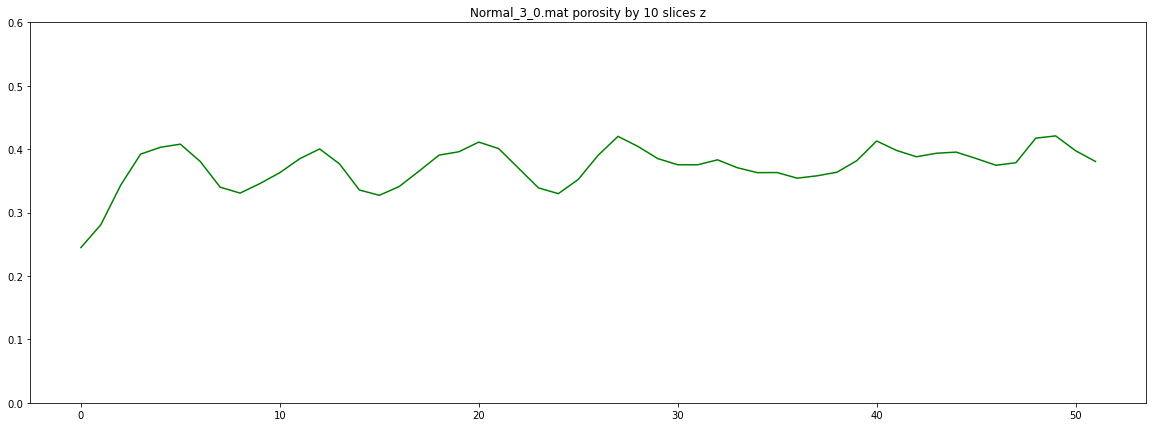

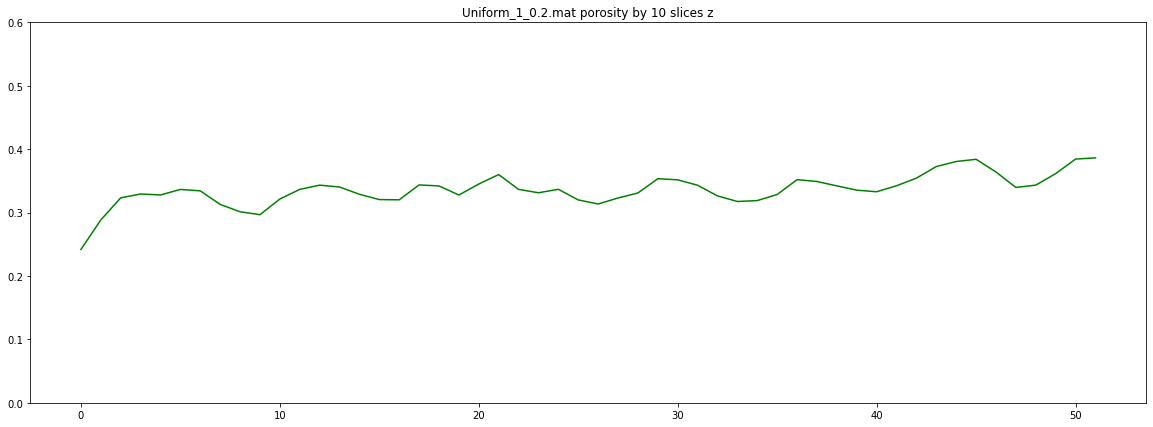

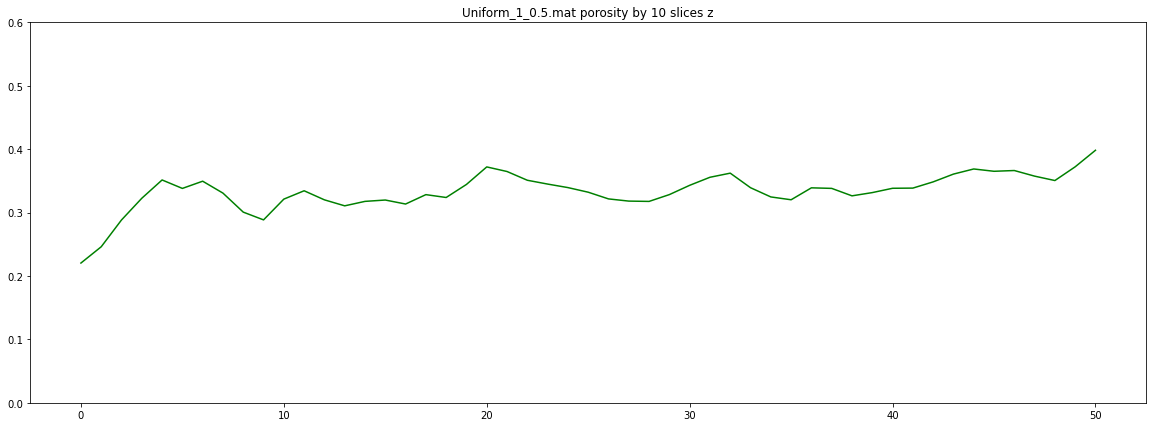

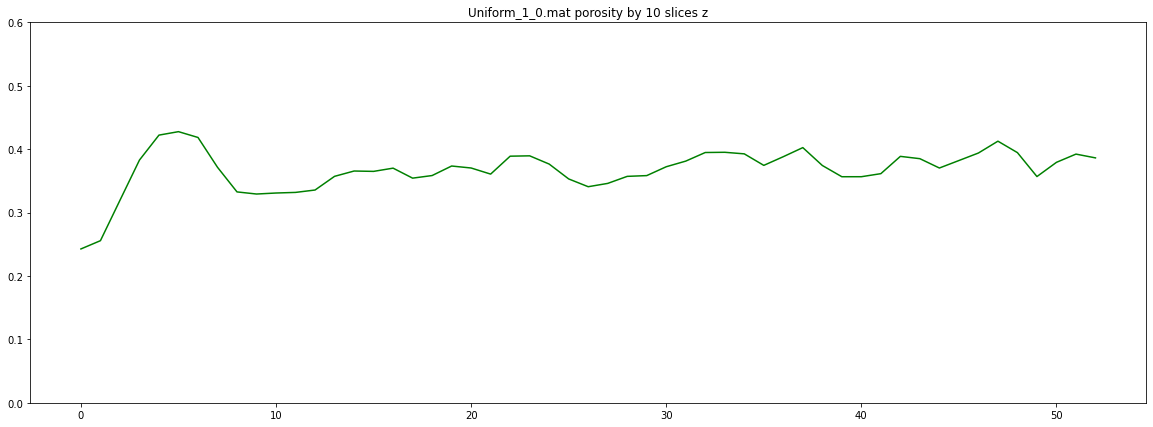

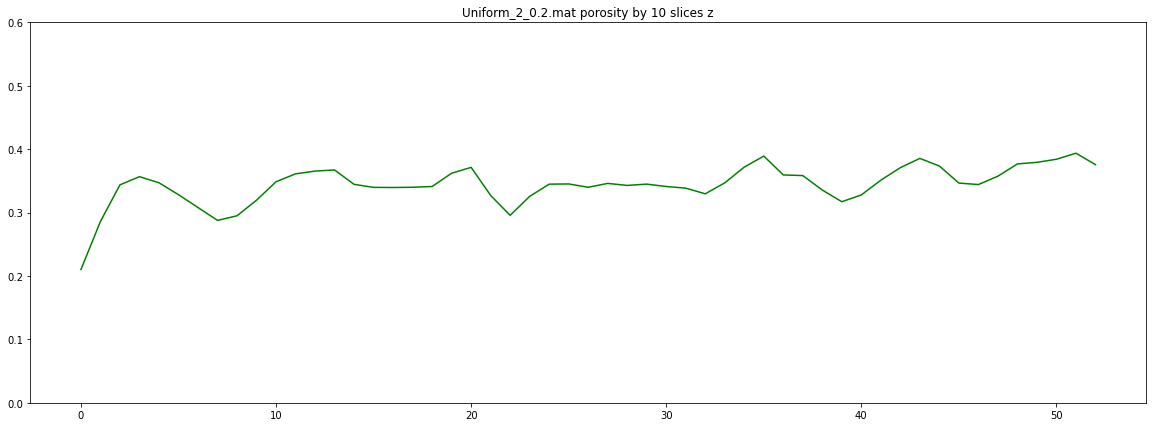

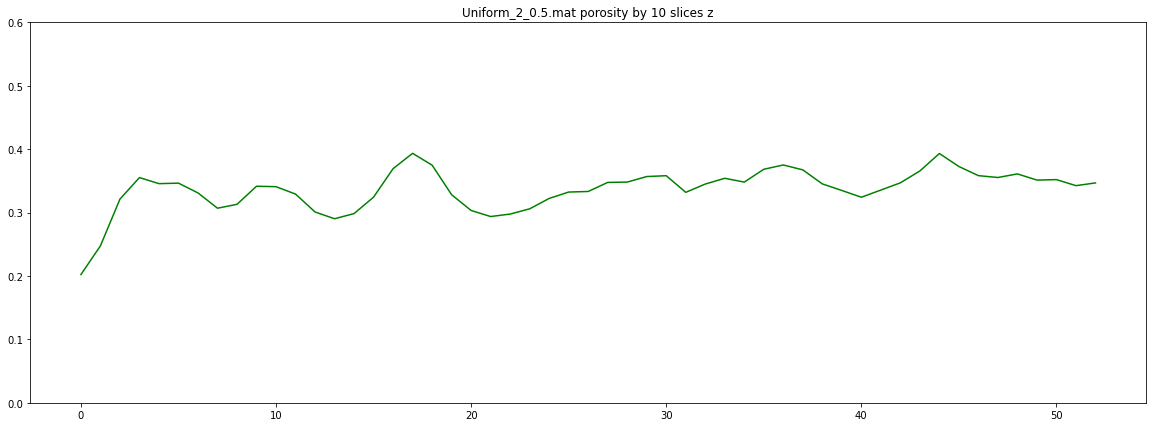

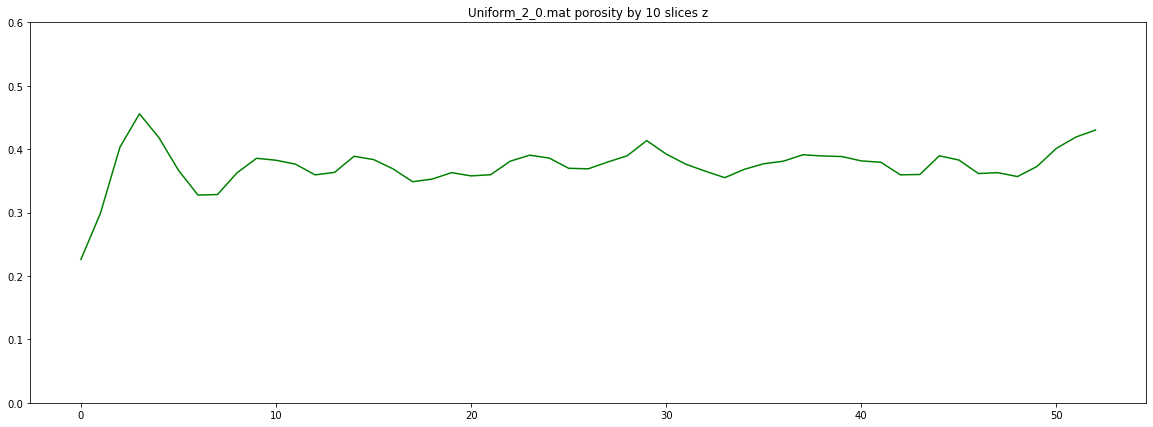

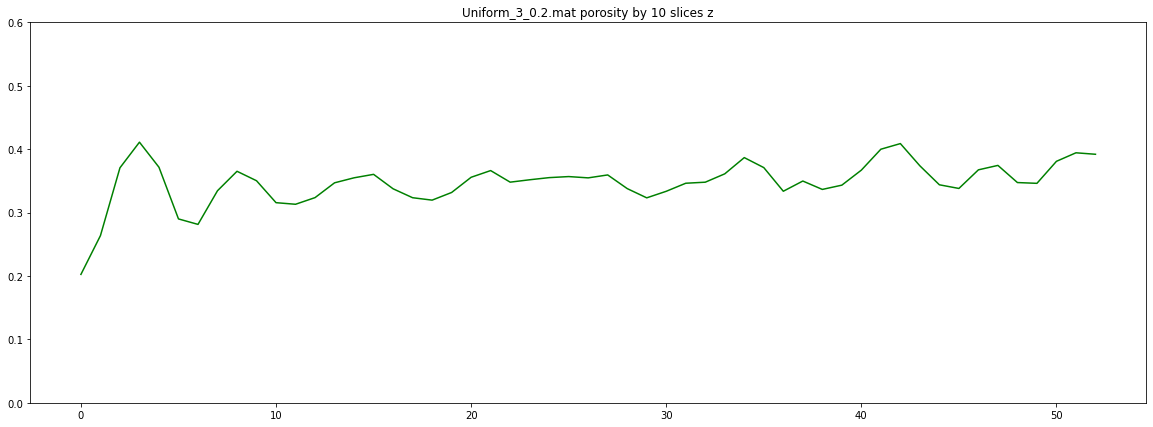

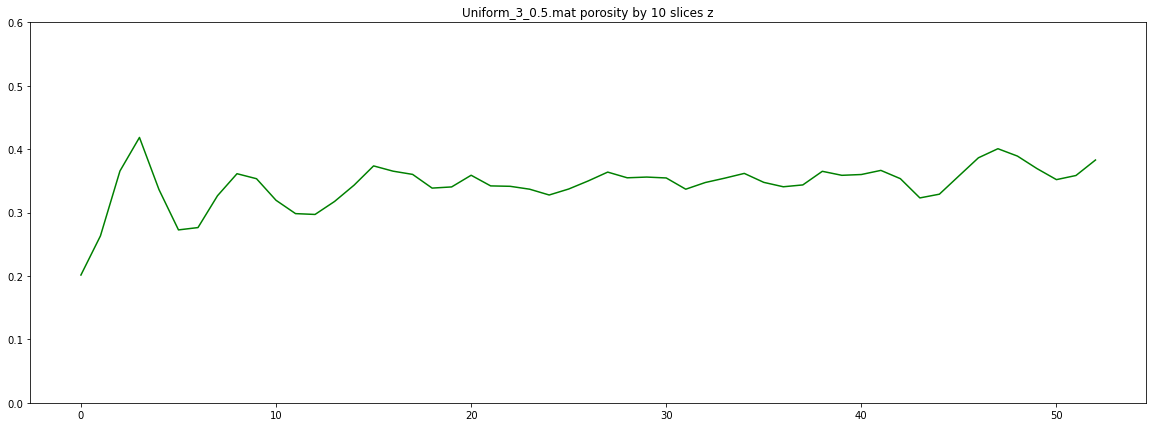

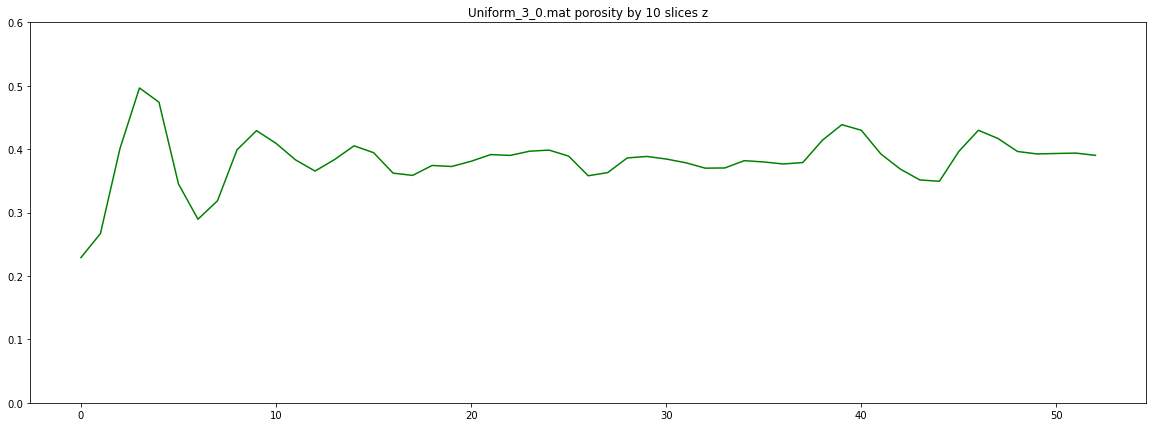

In [50]:
n_slice = 10
for filename in os.listdir(data_dir):
    extension = filename.split('.')[-1]
    if extension!= 'mat':
        continue
    mat = scipy.io.loadmat(os.path.join(data_dir, filename))    
    data_porosity_z = []
    
    for id_slice in range(0, size_sample[2], n_slice):
        array_slice_z = mat['bwImage'][:,:,id_slice:id_slice+n_slice]
        V_sample_z = array_slice_z.shape[0]*array_slice_z.shape[1]*array_slice_z.shape[2]            
        V_objects_z = array_slice_z.sum()
       
        porosity_sample_z = (V_sample_z - V_objects_z) / V_sample_z
        data_porosity_z.append(porosity_sample_z)
        
    plt.figure(figsize=(20, 7))
    plt.figure(1)
    plt.title(f"{filename} porosity by {n_slice} slices z")
    plt.plot(data_porosity_z, color='green')
    plt.ylim(0,0.6)
    plt.show()
        
        